### AI Lab -  Assignment 1 - CH22M503

#### Reference used 

In [34]:
#https://www.endpointdev.com/blog/2022/04/visualizing-data-with-pairplot-using-matplotlib/
#https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html
#https://stackoverflow.com/questions/71816076/how-to-calculate-the-percentage-of-overlap-between-2-ranges-with-python
#https://shankhanilborthakur.medium.com/plotting-data-visualisation-on-the-map-of-india-using-geopandas-in-python-211bc88c1e4d
#http://projects.datameet.org/maps/districts/ ----> shp and shx file is reffered from this website

#### Common File Path Details

In [35]:
#Question 1 
CancergeometryPath = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 1\\'
CancergeometryFileName = 'Cancergeometry.csv'

#Question 2
OutbreakPath = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 1\\'
OutbreakFileName = 'Outbreak_India.csv'

districtSHPPath = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 1\\IndiaMap\\MEGHALAYA\\maps-master\\Districts\\Census_2011\\2011_Dist.shp'
indiaSHPPath ='E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 1\\IndiaMap\\india-polygon.shp'

### Question 1

#### Q1 A team of scientists has collected data for studying tumor types (benign vs malignant) for cancer.The team has analyzed tumors for different geometrical aspects such as mean radius of tumor,mean texture of tumor, area of the tumor, etc. for both types of tumors benign (denoted as B) and malignant (denoted as M). Now, the team would like to know what significant geometrical aspects of the tumor which allow them to distinguish benign and malignant tumors in the future. Use different descriptive statistics and plots for answering the question. Also, use the plots to visualize if the variables are highly correlated and report the correlation coefficients for those variables. The data set to be used here is Cancergeometry.csv.

#### Common function 

In [50]:
#Common reusable function
def encoder_diag(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

def overlapping_percentage(interval1: list, interval2: list) -> int:
    # min max of each intervals
    min1, max1 = min(interval1), max(interval1)
    min2, max2 = min(interval2), max(interval2)
    # find overlapping boundaries
    lb, ub = 0, 0 # lower and upper bound
    if min1 <= min2 <= max1:
        if max1 >= max2:    # i2 is contained in i1
            lb, ub = min2, max2
        elif max1 < max2:
            lb, ub = min2, max1
    elif min2 <= min1 <= max2:
        if max1 <= max2:    # i1 is contained in i2
            lb, ub = min1, max1
        elif max1 > max2:
            lb, ub = min1, max2    
    percent = int((ub - lb) / (interval2[1] - interval2[0]) * 100)
    return f'{percent}%'

def find_outliers_percentage(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outlier_percentage = len(outliers)/len(df)
    return outlier_percentage


#### Importing Library

In [51]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Change the working directory and load the data

In [52]:
#Change the working directory 
os.chdir(CancergeometryPath)
#Load the data set 
df_Cancergeometry = pd.read_csv(CancergeometryFileName)
#Get the statistical details
#print(df_Cancergeometry)
df_Cancergeometry.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [53]:
df_Cancergeometry.info()
#No null value is present in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Data is clean with no missing value.

#### Filter out benign and malignant type of tumor data

==========Distribution of Malignant and Benign types of tumor============


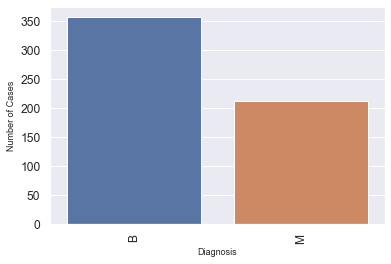

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
#Filter out benign and malignant tumor
benign_tumor_data = df_Cancergeometry[df_Cancergeometry['diagnosis'] == 'B']
malignant_tumor_data = df_Cancergeometry[df_Cancergeometry['diagnosis'] == 'M']

print('==========Distribution of Malignant and Benign types of tumor============')
tumor_type_count= df_Cancergeometry['diagnosis'].value_counts()  
sns.barplot(x=tumor_type_count.index, y=tumor_type_count.values)
plt.ylabel('Number of Cases', fontsize=9)
plt.xlabel('Diagnosis', fontsize=9)
plt.xticks(rotation=90)
plt.show();
df_Cancergeometry['diagnosis'].value_counts()

##### 212 - Malignant, 357 - Benign. 'benign' and 'maglinant' are presented as 1 and 0, respectively in further analysis

#### Outlier Analysis for each feature

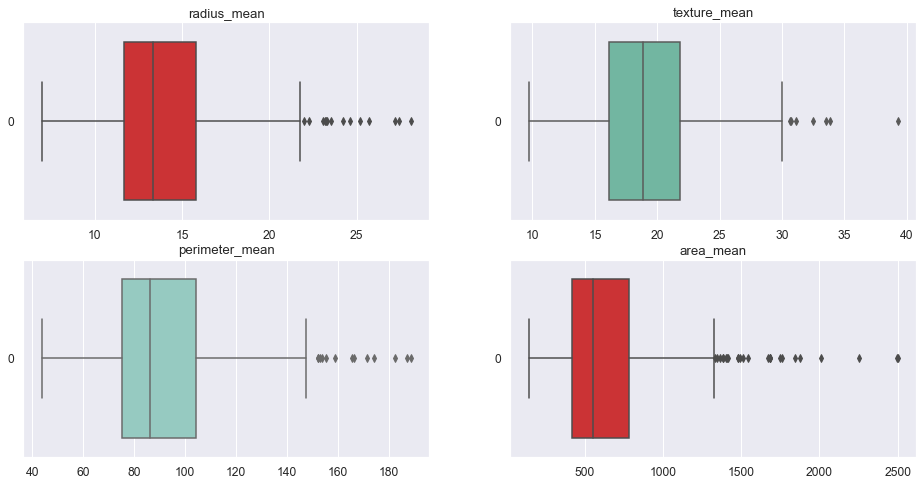

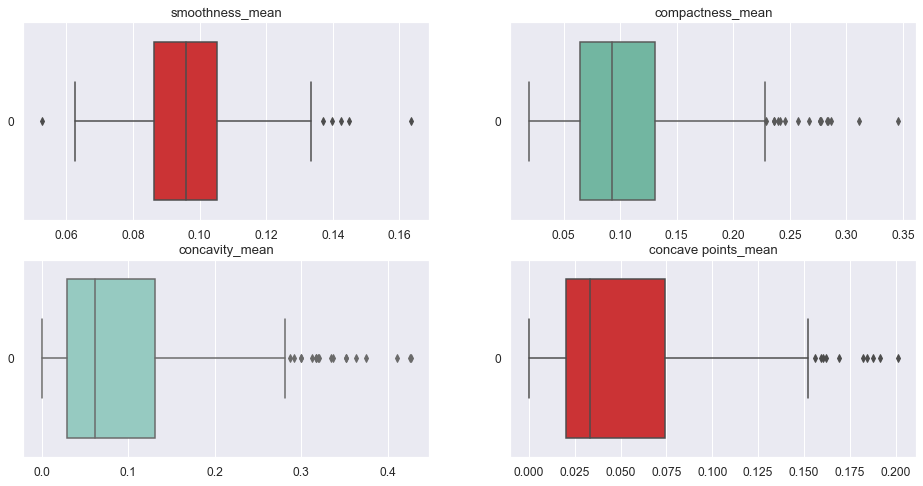

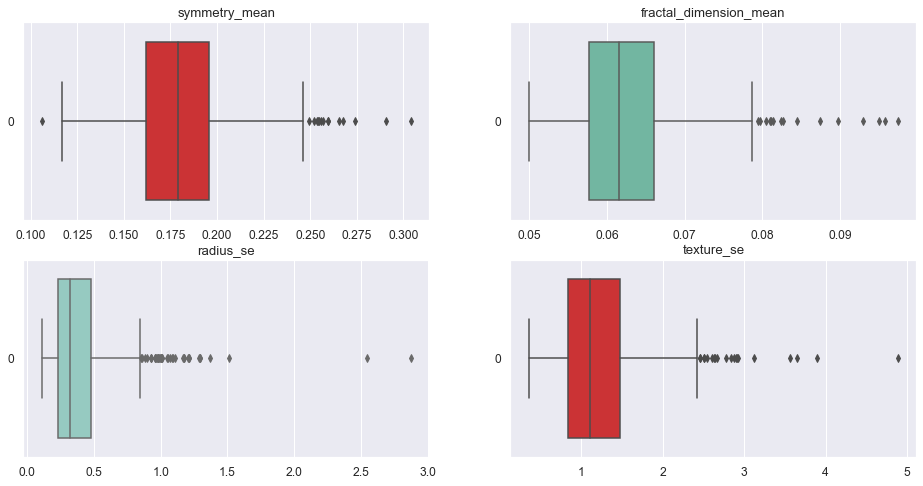

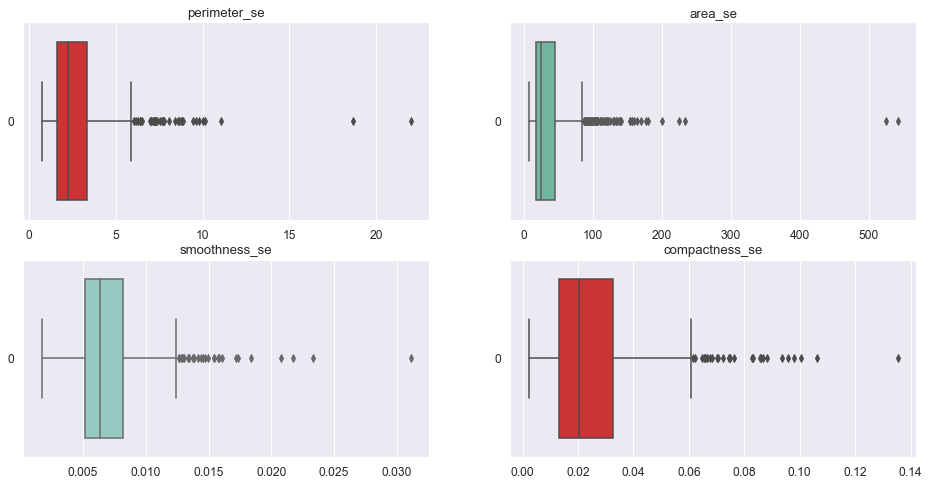

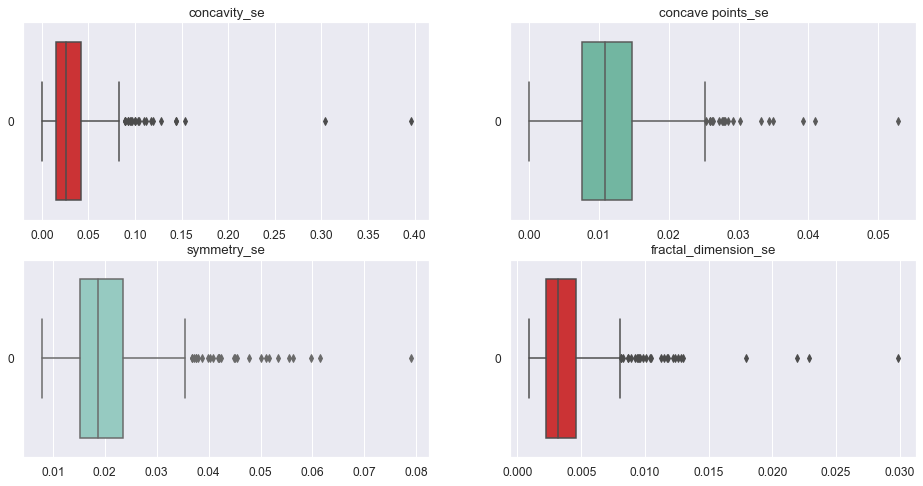

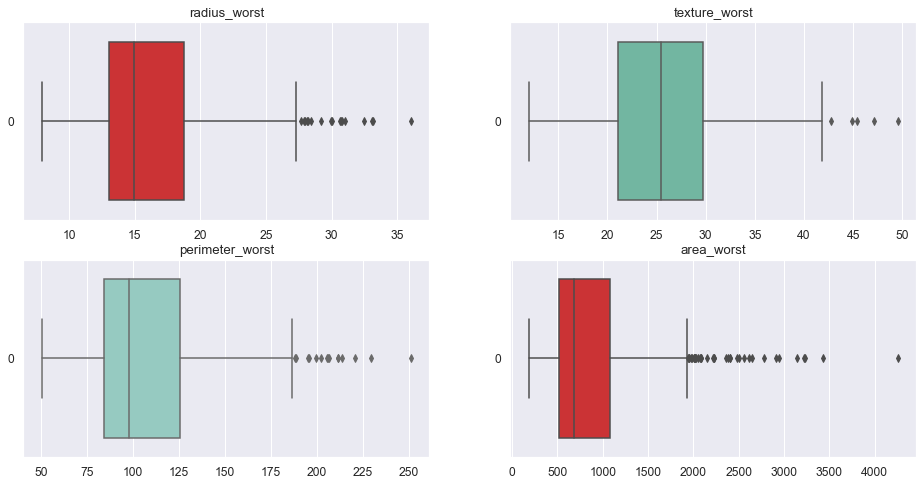

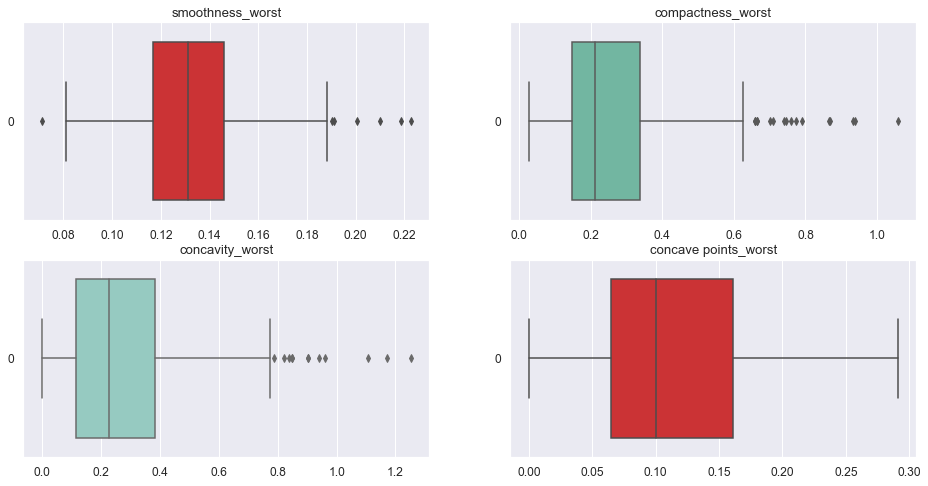

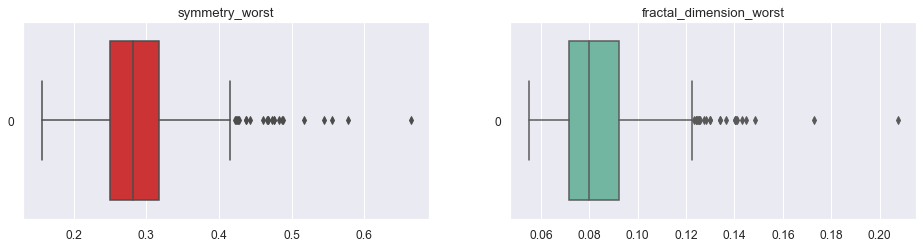

In [55]:
#Box plot for each feature to see the percentage of outlier in the data
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['radius_mean'],orient='h',palette="Set1").set(title='radius_mean')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['texture_mean'],orient='h',palette="Set2").set(title='texture_mean')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['perimeter_mean'],orient='h',palette="Set3").set(title='perimeter_mean')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['area_mean'],orient='h',palette="Set1").set(title='area_mean')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['smoothness_mean'],orient='h',palette="Set1").set(title='smoothness_mean')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['compactness_mean'],orient='h',palette="Set2").set(title='compactness_mean')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['concavity_mean'],orient='h',palette="Set3").set(title='concavity_mean')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['concave points_mean'],orient='h',palette="Set1").set(title='concave points_mean')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['symmetry_mean'],orient='h',palette="Set1").set(title='symmetry_mean')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['fractal_dimension_mean'],orient='h',palette="Set2").set(title='fractal_dimension_mean')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['radius_se'],orient='h',palette="Set3").set(title='radius_se')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['texture_se'],orient='h',palette="Set1").set(title='texture_se')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['perimeter_se'],orient='h',palette="Set1").set(title='perimeter_se')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['area_se'],orient='h',palette="Set2").set(title='area_se')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['smoothness_se'],orient='h',palette="Set3").set(title='smoothness_se')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['compactness_se'],orient='h',palette="Set1").set(title='compactness_se')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['concavity_se'],orient='h',palette="Set1").set(title='concavity_se')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['concave points_se'],orient='h',palette="Set2").set(title='concave points_se')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['symmetry_se'],orient='h',palette="Set3").set(title='symmetry_se')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['fractal_dimension_se'],orient='h',palette="Set1").set(title='fractal_dimension_se')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['radius_worst'],orient='h',palette="Set1").set(title='radius_worst')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['texture_worst'],orient='h',palette="Set2").set(title='texture_worst')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['perimeter_worst'],orient='h',palette="Set3").set(title='perimeter_worst')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['area_worst'],orient='h',palette="Set1").set(title='area_worst')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['smoothness_worst'],orient='h',palette="Set1").set(title='smoothness_worst')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['compactness_worst'],orient='h',palette="Set2").set(title='compactness_worst')
plt.subplot(2,2,3)
sns.boxplot(data = df_Cancergeometry['concavity_worst'],orient='h',palette="Set3").set(title='concavity_worst')
plt.subplot(2,2,4)
sns.boxplot(data = df_Cancergeometry['concave points_worst'],orient='h',palette="Set1").set(title='concave points_worst')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = df_Cancergeometry['symmetry_worst'],orient='h',palette="Set1").set(title='symmetry_worst')
plt.subplot(2,2,2)
sns.boxplot(data = df_Cancergeometry['fractal_dimension_worst'],orient='h',palette="Set2").set(title='fractal_dimension_worst')
plt.show()


#### Calculate outlier percentage

In [56]:
for feature in df_Cancergeometry.columns:
    if(feature != None):        
        if(feature != 'id' and feature != 'diagnosis'):
            print(f'{feature} : {find_outliers_percentage(df_Cancergeometry[feature])}')

radius_mean : 0.02460456942003515
texture_mean : 0.012302284710017574
perimeter_mean : 0.022847100175746926
area_mean : 0.043936731107205626
smoothness_mean : 0.01054481546572935
compactness_mean : 0.028119507908611598
concavity_mean : 0.03163444639718805
concave points_mean : 0.01757469244288225
symmetry_mean : 0.026362038664323375
fractal_dimension_mean : 0.026362038664323375
radius_se : 0.06678383128295255
texture_se : 0.0351493848857645
perimeter_se : 0.06678383128295255
area_se : 0.11423550087873462
smoothness_se : 0.05272407732864675
compactness_se : 0.0492091388400703
concavity_se : 0.03866432337434095
concave points_se : 0.033391915641476276
symmetry_se : 0.04745166959578207
fractal_dimension_se : 0.0492091388400703
radius_worst : 0.029876977152899824
texture_worst : 0.008787346221441126
perimeter_worst : 0.026362038664323375
area_worst : 0.061511423550087874
smoothness_worst : 0.012302284710017574
compactness_worst : 0.028119507908611598
concavity_worst : 0.0210896309314587
co

#### Outlier percentage is not significant hence we can skip this for now and we will see the correlation is affecting due to outlier or not using both pearson and spearman correlation analysis. If both type of correlation are signifantly different then we will go for outlier removal

#### Show each feature wise mean and spread for different tumor type

In [57]:
print('========Highlight the each feature wise higher mean, max and min value======')
display(df_Cancergeometry[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]].groupby(["diagnosis"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="YlOrRd"))

========Highlight the each feature wise higher mean, max and min value======


#### Create plot to see the variance in graphical way to identify the overlapping in the spread for different tumor type

========Now verify the spread of each feature value for diffent types of tumor to understand the variance========


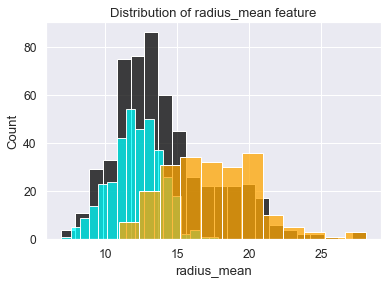

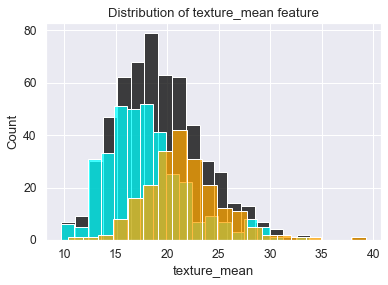

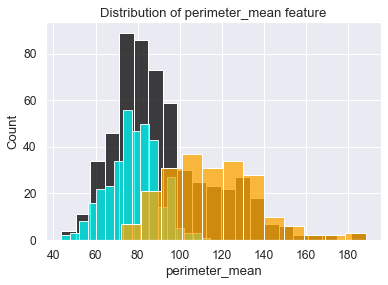

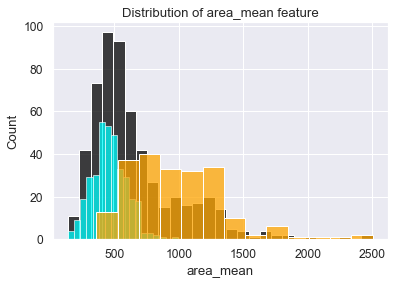

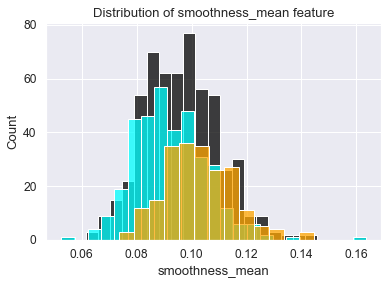

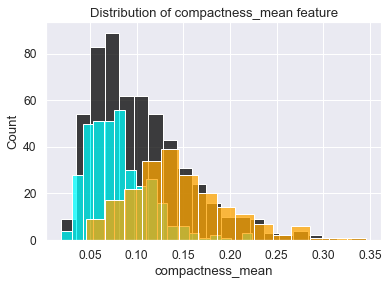

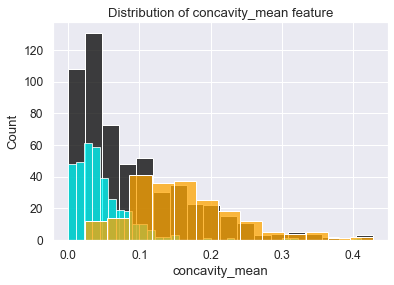

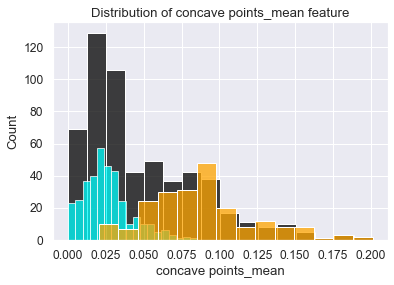

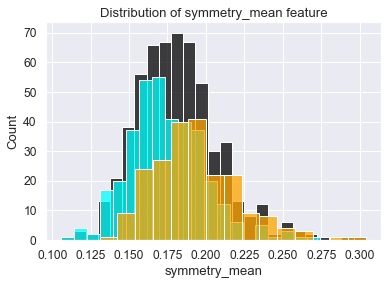

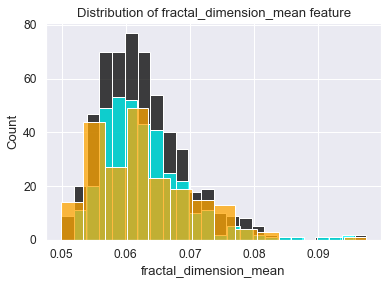

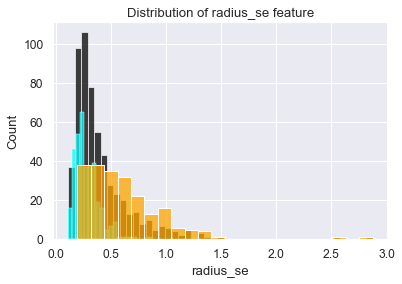

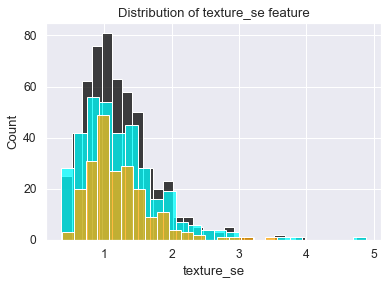

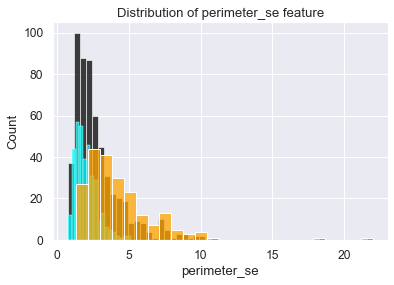

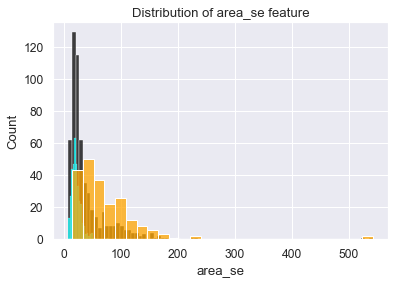

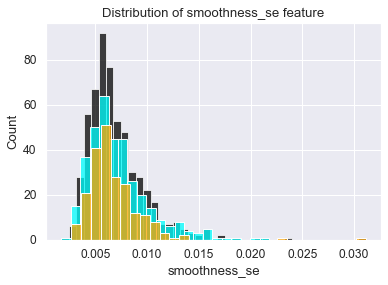

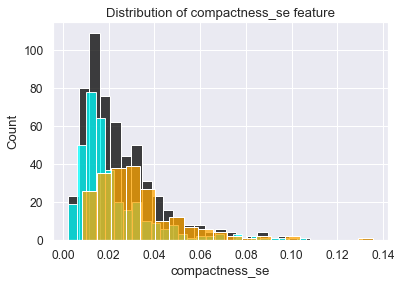

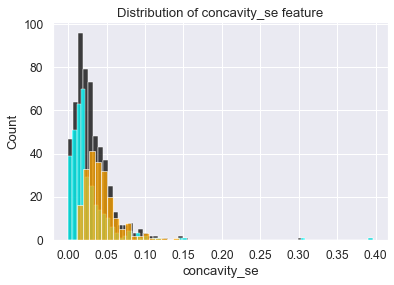

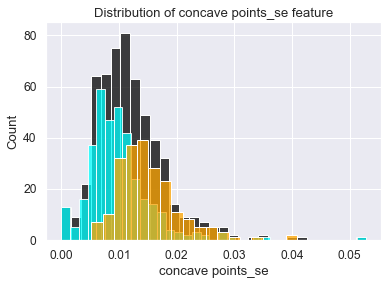

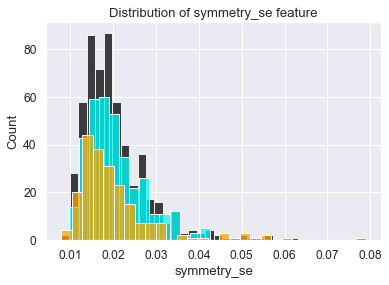

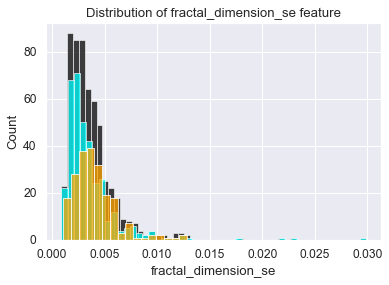

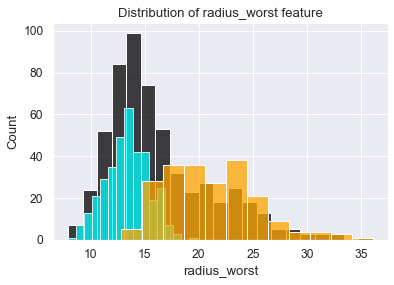

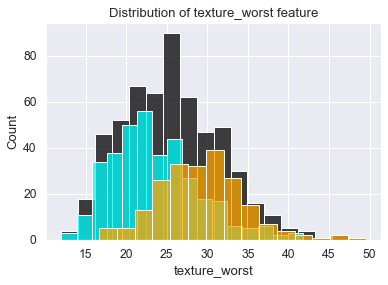

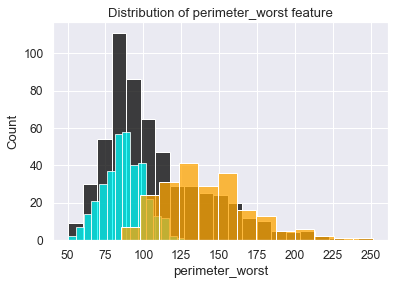

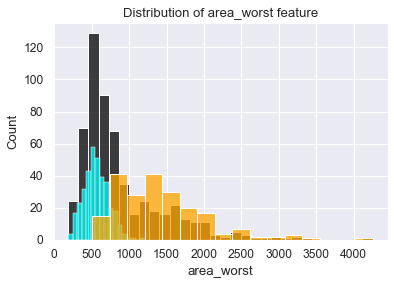

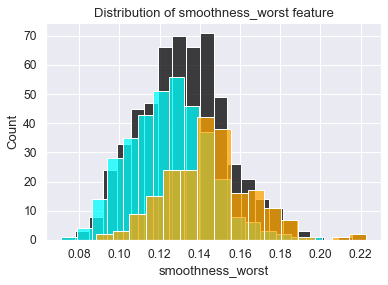

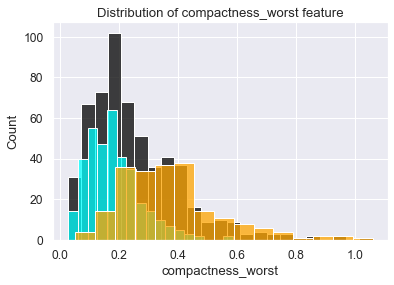

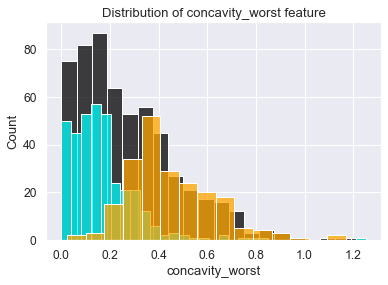

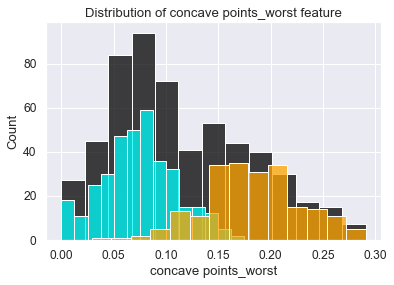

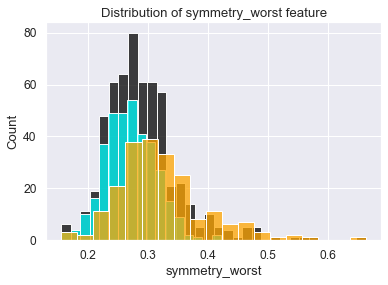

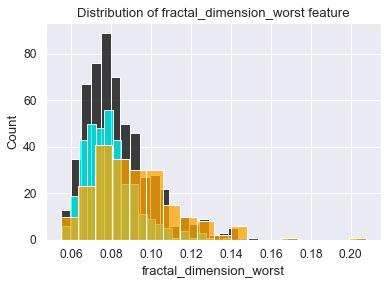

In [59]:
print('========Now verify the spread of each feature value for diffent types of tumor to understand the variance========')
for feature in df_Cancergeometry.columns:
    if(feature != None):        
        if(feature != 'id' and feature != 'diagnosis'):
            sns.histplot(df_Cancergeometry[feature], color="black") # For total set of data
            sns.histplot(benign_tumor_data[feature], color="cyan") # For only benign tumor
            sns.histplot(malignant_tumor_data[feature], color="orange") # For only malignant tumor
            plt.title(f"Distribution of {feature} feature")
            plt.show()

#### To understand which feature can be well suited for identifying the type of tumor we need to understand the conclusion drawn capability of that feature.
#### One way to look at it is identifying the minimum overlap in the distribution of benign and malignant tumor for each feature If there is very less or no overlap in distribution for any feature we can consider that feature as a conclusive feature in identifying tumor.

#### Pairplot for mean parameter

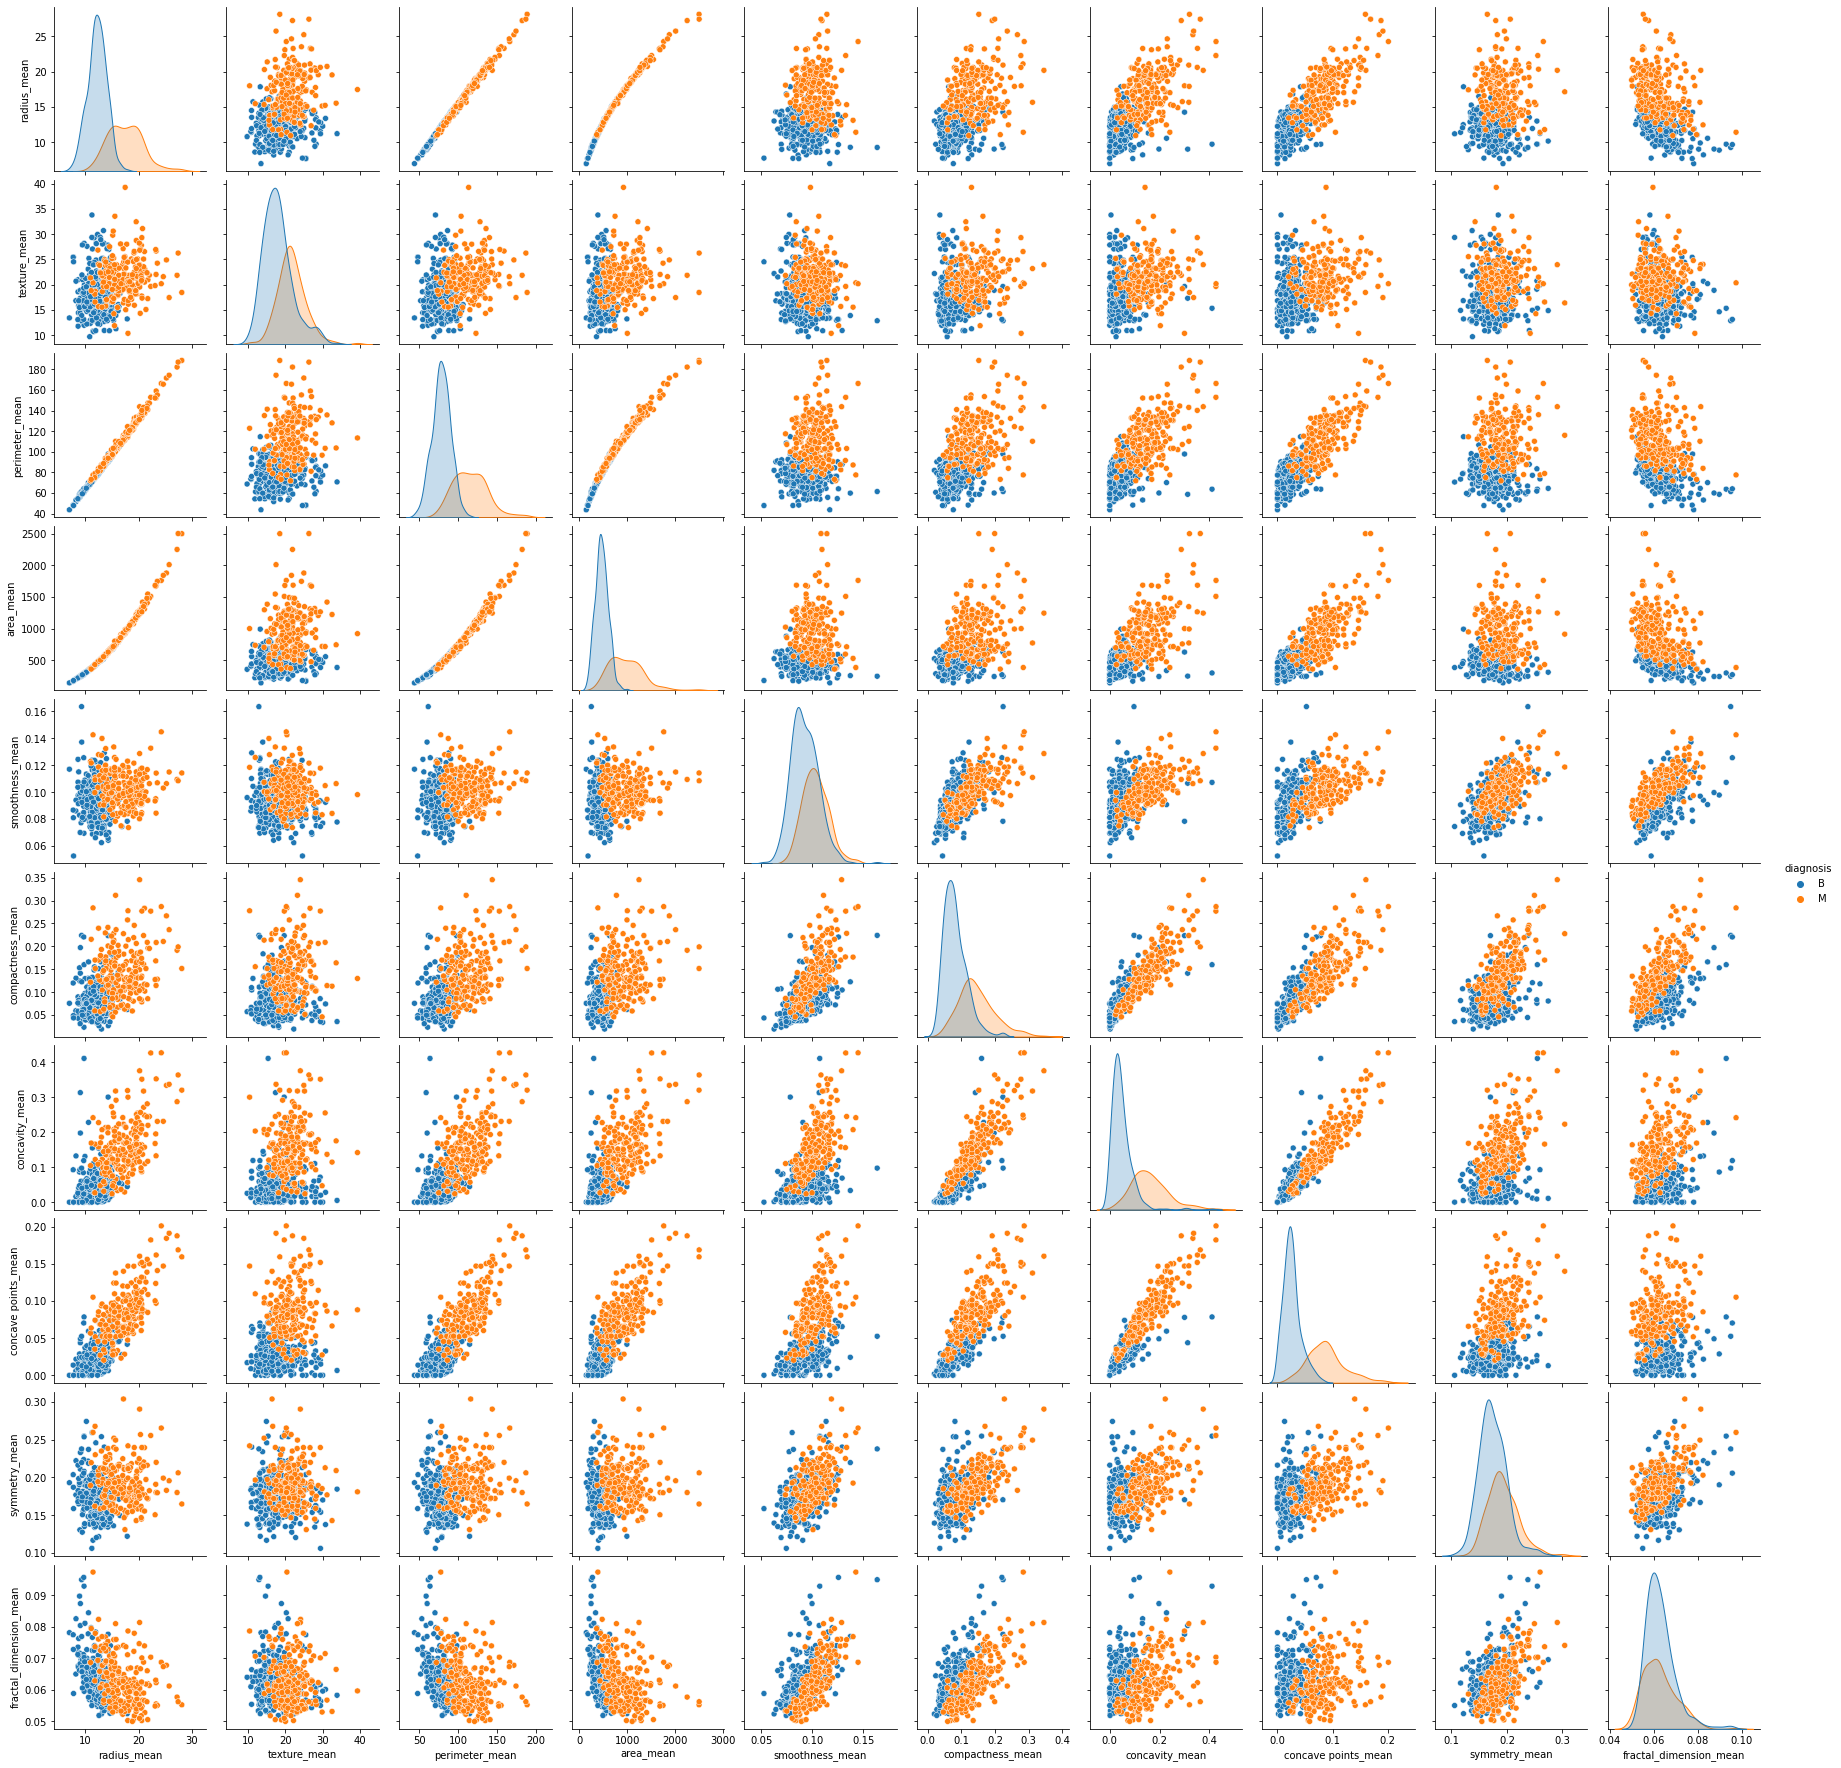

In [13]:
sns.pairplot(df_Cancergeometry[['diagnosis',"radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]],hue="diagnosis")
plt.show()

#### Pairplot also giving same intution like hist plot and violin, Now we now have to perform analysis on the overlapping percentage for further conclusion.

#### Calculate the overlapping of the spread for different features

In [16]:
#Understanding the overlapping percentage to identify valuable feature in identifying the tumor type
df_Corr_overlappingPercentage = pd.DataFrame(columns=['Feature', 'OverlappingPercentage', 'Correlation']) 
for feature in df_Cancergeometry.columns:
    if(feature != None):        
        if(feature != 'id' and feature != 'diagnosis'):
            i1, i2 = [np.min(benign_tumor_data[feature]), np.max(benign_tumor_data[feature])], [np.min(malignant_tumor_data[feature]), np.max(malignant_tumor_data[feature])]
            print(f'Overlapping percentage of {feature} is {overlapping_percentage(i1, i2)}')
            df_intermediate_data = {'Feature': feature, 'OverlappingPercentage': overlapping_percentage(i1, i2), 'Correlation': 0}
            df_Corr_overlappingPercentage = pd.concat([df_Corr_overlappingPercentage, pd.DataFrame([df_intermediate_data])],ignore_index=True)
        


Overlapping percentage of radius_mean is 40%
Overlapping percentage of texture_mean is 81%
Overlapping percentage of perimeter_mean is 36%
Overlapping percentage of area_mean is 29%
Overlapping percentage of smoothness_mean is 100%
Overlapping percentage of compactness_mean is 59%
Overlapping percentage of concavity_mean is 96%
Overlapping percentage of concave points_mean is 35%
Overlapping percentage of symmetry_mean is 82%
Overlapping percentage of fractal_dimension_mean is 92%
Overlapping percentage of radius_se is 25%
Overlapping percentage of texture_se is 100%
Overlapping percentage of perimeter_se is 18%
Overlapping percentage of area_se is 11%
Overlapping percentage of smoothness_se is 67%
Overlapping percentage of compactness_se is 77%
Overlapping percentage of concavity_se is 100%
Overlapping percentage of concave points_se is 100%
Overlapping percentage of symmetry_se is 73%
Overlapping percentage of fractal_dimension_se is 100%
Overlapping percentage of radius_worst is 30%

#### Calculate the correlation of different features with target variable & display using heat map

=========Check for the correlation between different feature==========


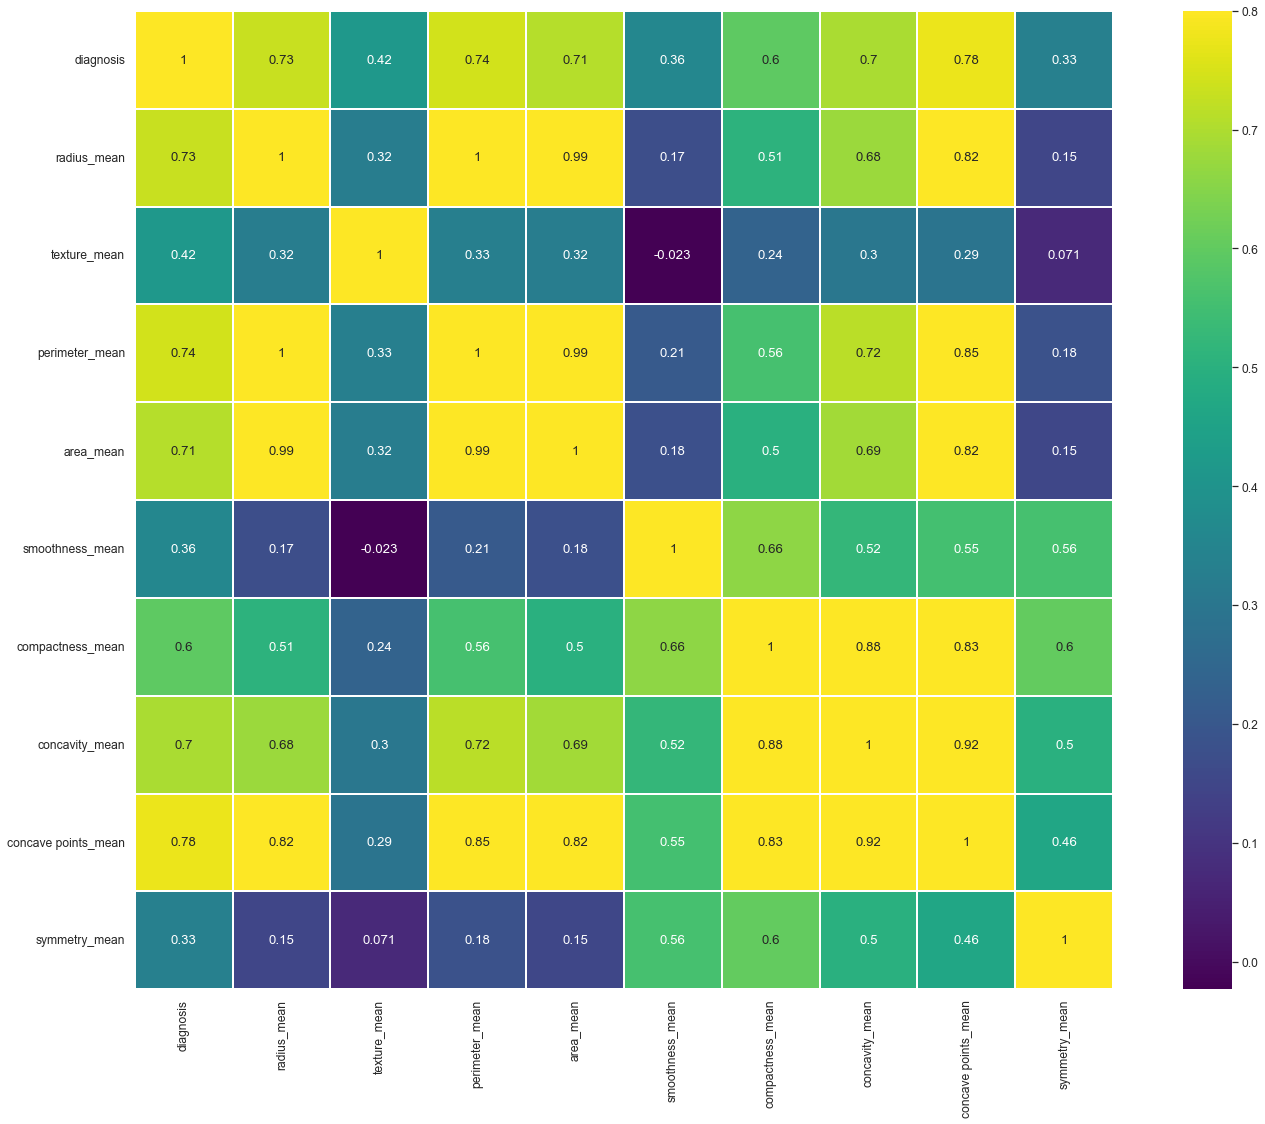

In [18]:
print('=========Check for the correlation between different feature==========')
#Apply encoding in categorical field diagnosis
df_Cancergeometry['diagnosis'] = df_Cancergeometry['diagnosis'].apply(encoder_diag)
#Creating heat map to see the correlation in a very clear way
correlationMatrix=df_Cancergeometry[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean",
                 "concavity_mean","concave points_mean","symmetry_mean"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(25, 18))
sns.heatmap(correlationMatrix, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white")
plt.show()

=========Check for the correlation between different feature==========


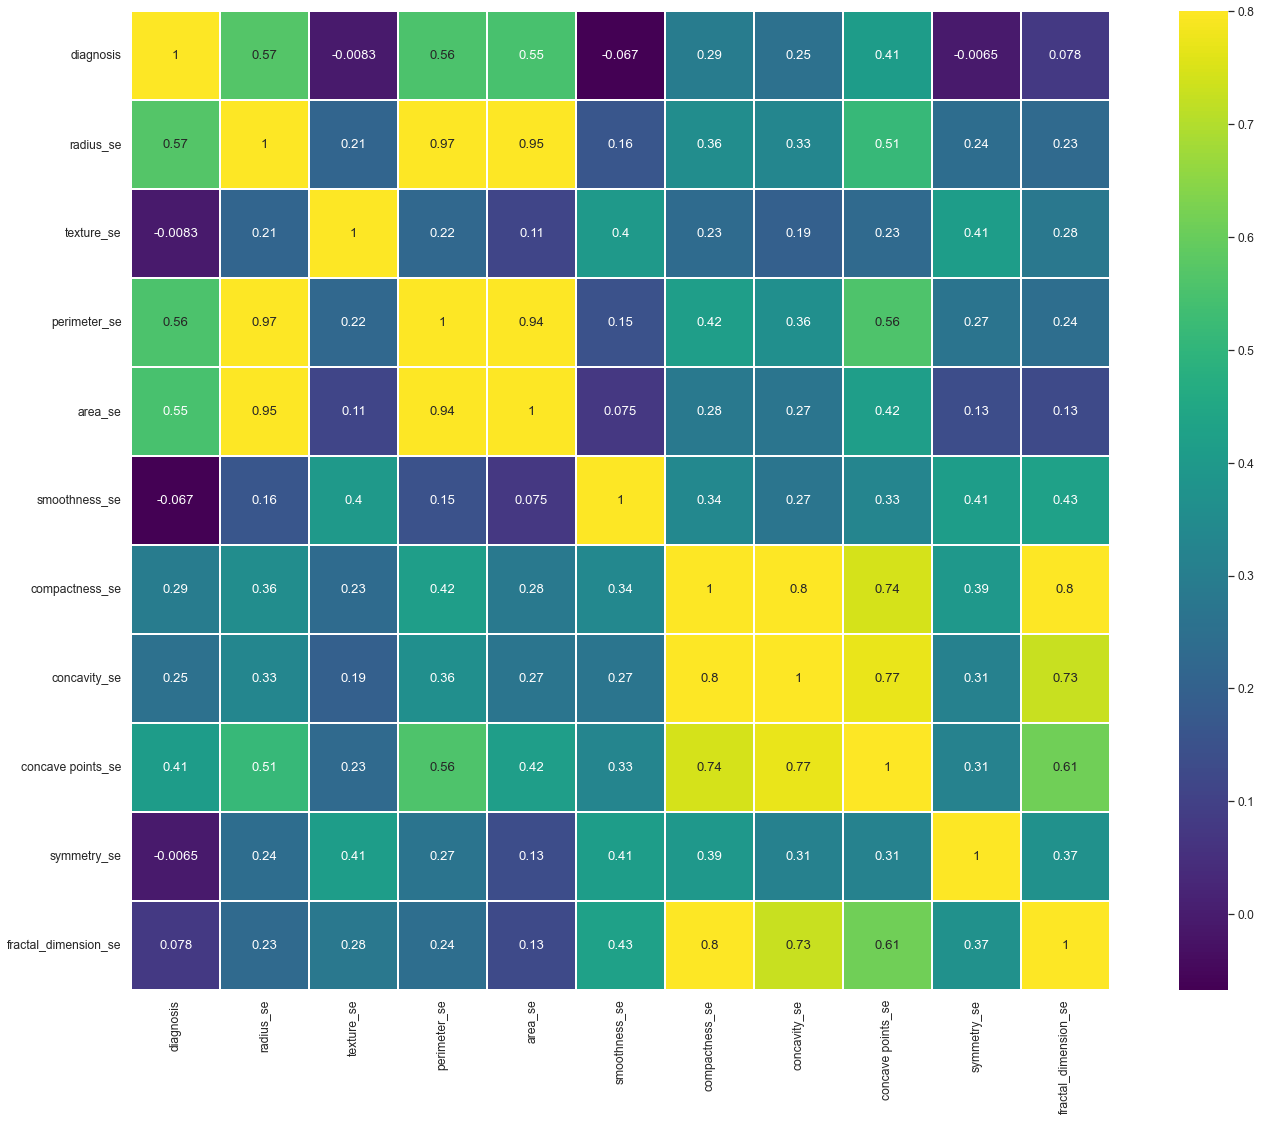

In [19]:
print('=========Check for the correlation between different feature==========')
#Creating heat map to see the correlation in a very clear way
correlationMatrix=df_Cancergeometry[["diagnosis","radius_se","texture_se",
                 "perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se",
                 "fractal_dimension_se"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(25, 18))
sns.heatmap(correlationMatrix, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white")
plt.show()

=========Check for the correlation between different feature==========


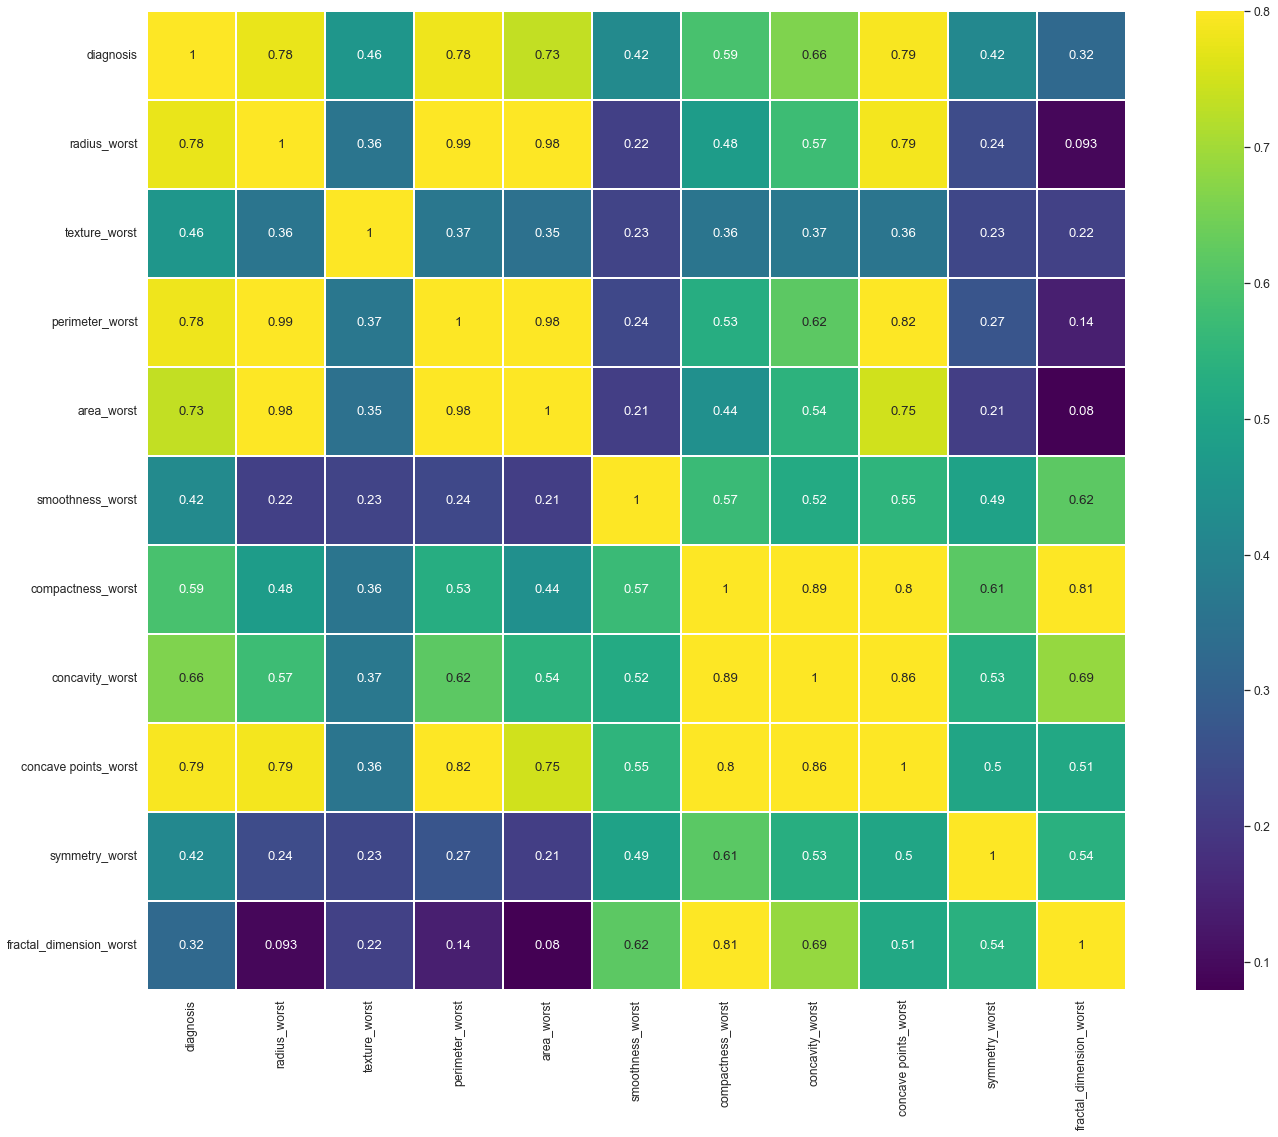

In [20]:
print('=========Check for the correlation between different feature==========')
#Creating heat map to see the correlation in a very clear way
correlationMatrix=df_Cancergeometry[["diagnosis","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
                 "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(25, 18))
sns.heatmap(correlationMatrix, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white")
plt.show()

#### Looking at the correlation number we can observe that radius is highly correlated with permiter, area, concavity, cocave point. So as per PCA concept we can use only radius instead of all, which should give correct prediction. Further analysis is required for conclusion
#### Correlated features are : mean perimeter vs. mean area, mean concavity vs. mean concave points, and worst symmetry vs. worst fractal dimension

In [21]:
print('=========Correlation between dignosis column with other features for identifying the type of tumor=========')
#Calculate the correlation between dignosis column with other feature for detecting the type of tumor
correlation_cancerType_withFeature=df_Cancergeometry.corr()["diagnosis"]
correlation_cancerType_withFeature[np.argsort(correlation_cancerType_withFeature, axis=0)[:-1]]

for index, row in df_Corr_overlappingPercentage.iterrows():
    if(row['Feature'] == 'radius_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.radius_mean                
    if(row['Feature'] == 'texture_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.texture_mean 
    if(row['Feature'] == 'perimeter_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.perimeter_mean 
    if(row['Feature'] == 'area_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.area_mean                
    if(row['Feature'] == 'smoothness_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.smoothness_mean 
    if(row['Feature'] == 'compactness_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.compactness_mean    
    if(row['Feature'] == 'concavity_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.concavity_mean                
    if(row['Feature'] == 'concave points_mean'):
        row['Correlation'] = correlation_cancerType_withFeature['concave points_mean']
    if(row['Feature'] == 'symmetry_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.symmetry_mean 
    if(row['Feature'] == 'fractal_dimension_mean'):
        row['Correlation'] = correlation_cancerType_withFeature.fractal_dimension_mean                
    if(row['Feature'] == 'radius_se'):
        row['Correlation'] = correlation_cancerType_withFeature.radius_se 
    if(row['Feature'] == 'texture_se'):
        row['Correlation'] = correlation_cancerType_withFeature.texture_se    
    if(row['Feature'] == 'perimeter_se'):
        row['Correlation'] = correlation_cancerType_withFeature.perimeter_se                 
    if(row['Feature'] == 'area_se'):
        row['Correlation'] = correlation_cancerType_withFeature.area_se 
    if(row['Feature'] == 'smoothness_se'):
        row['Correlation'] = correlation_cancerType_withFeature.smoothness_se 
    if(row['Feature'] == 'compactness_se'):
        row['Correlation'] = correlation_cancerType_withFeature.compactness_se                
    if(row['Feature'] == 'concavity_se'):
        row['Correlation'] = correlation_cancerType_withFeature.concavity_se 
    if(row['Feature'] == 'concave points_se'):
        row['Correlation'] = correlation_cancerType_withFeature['concave points_se']    
    if(row['Feature'] == 'symmetry_se'):
        row['Correlation'] = correlation_cancerType_withFeature.symmetry_se                
    if(row['Feature'] == 'fractal_dimension_se'):
        row['Correlation'] = correlation_cancerType_withFeature.fractal_dimension_se 
    if(row['Feature'] == 'radius_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.radius_worst 
    if(row['Feature'] == 'texture_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.texture_worst                
    if(row['Feature'] == 'perimeter_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.perimeter_worst 
    if(row['Feature'] == 'area_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.area_worst    
    if(row['Feature'] == 'smoothness_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.smoothness_worst                
    if(row['Feature'] == 'compactness_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.compactness_worst 
    if(row['Feature'] == 'concavity_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.concavity_worst 
    if(row['Feature'] == 'concave points_worst'):
        row['Correlation'] = correlation_cancerType_withFeature['concave points_worst']                
    if(row['Feature'] == 'symmetry_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.symmetry_worst 
    if(row['Feature'] == 'fractal_dimension_worst'):
        row['Correlation'] = correlation_cancerType_withFeature.fractal_dimension_worst  
print(correlation_cancerType_withFeature)

=========Correlation between dignosis column with other features for identifying the type of tumor=========
id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0

#### Calculate Spearman's Rank Correlation as this is works well if the relationship between features are linear and roughly normal. More over it is much robust, if there are outliers.

In [22]:
ranked_data = df_Cancergeometry.rank()
spearman_corr = ranked_data.loc[:,["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean",
                 "concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se",
                 "perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se",
                 "fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
                 "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]].corr(method= "pearson")
print("Spearman's correlation: ")
spearman_corr

Spearman's correlation: 


diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.732785      0.461971        0.748496   
radius_mean               0.732785     1.000000      0.340956        0.997802   
texture_mean              0.461971     0.340956      1.000000        0.348142   
perimeter_mean            0.748496     0.997802      0.348142        1.000000   
area_mean                 0.734122     0.999602      0.344145        0.997068   
smoothness_mean           0.371892     0.148510      0.024649        0.182923   
compactness_mean          0.609288     0.497578      0.266499        0.543925   
concavity_mean            0.733308     0.645728      0.342646        0.681958   
concave points_mean       0.777877     0.759702      0.306891        0.788629   
symmetry_mean             0.332567     0.120242      0.110130        0.150049   
fractal_dimension_mean   -0.025903    -0.349931     -0.059303       -0.304891   
radius_se                 0.616912     0.550247      0.363621        0.560326   
texture_se                0.019419    -0.144499      0.450720       -0.137578   
perimeter_se              0.630411     0.565520      0.386813        0.582789   
area_se                   0.714184     0.738077      0.395139        0.745824   
smoothness_se            -0.052193    -0.326385      0.037048       -0.311147   
compactness_se            0.380666     0.264904      0.263591        0.308620   
concavity_se              0.470338     0.364555      0.287188        0.402277   
concave points_se         0.488717     0.410576      0.238610        0.441996   
symmetry_se              -0.092303    -0.241376      0.008945       -0.228187   
fractal_dimension_se      0.201492    -0.008411      0.147605        0.032429   
radius_worst              0.787933     0.978604      0.366547        0.981244   
texture_worst             0.476720     0.314911      0.909218        0.323109   
perimeter_worst           0.796319     0.971555      0.375273        0.978980   
area_worst                0.786902     0.978863      0.368335        0.980864   
smoothness_worst          0.425513     0.125789      0.101401        0.156611   
compactness_worst         0.606810     0.491357      0.290917        0.534565   
concavity_worst           0.705734     0.596043      0.339725        0.632106   
concave points_worst      0.781674     0.727265      0.319235        0.757526   
symmetry_worst            0.396843     0.174698      0.120693        0.199007   
fractal_dimension_worst   0.311477     0.044564      0.116144        0.088961   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.734122         0.371892          0.609288   
radius_mean               0.999602         0.148510          0.497578   
texture_mean              0.344145         0.024649          0.266499   
perimeter_mean            0.997068         0.182923          0.543925   
area_mean                 1.000000         0.138053          0.488988   
smoothness_mean           0.138053         1.000000          0.678806   
compactness_mean          0.488988         0.678806          1.000000   
concavity_mean            0.642557         0.518511          0.896518   
concave points_mean       0.755165         0.565172          0.848295   
symmetry_mean             0.113928         0.542228          0.552203   
fractal_dimension_mean   -0.358425         0.588465          0.499195   
radius_se                 0.553388         0.334282          0.506582   
texture_se               -0.142469         0.091283          0.047766   
perimeter_se              0.568237         0.331360          0.583520   
area_se                   0.741518         0.296059          0.539511   
smoothness_se            -0.327431         0.338692          0.127381   
compactness_se            0.260362         0.392455          0.817875   
concavity_se              0.362308         0.354730          0.772283   
concave points_se         0.406468         0.

#### Spearman's correlation is little higher than pearson correlation, but there is no major difference which signifies no change to our conclusion made based on heat map analysis hence no outlier removal is required.


#### Conclusive Statement 3 : Tumor type is highly correlated with radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean, radius_worst, perimeter_worst, area_worst, concavity_worst(cant be consider as overlapping percentage is 100% so not conclusive), concave points_worst features


#### Conclusive Statement 4 : fractal_dimension_mean, smoothness_se, symmetry_se features has very insignificant correlation with the type of tumor, so before concluding on rejeting these features we have to check whether this feature has any significant correlation with other feature

#### Analysis based on correlation continues here 

In [23]:
print('=========Correlation of fractal_dimension_mean feature with other fearures=========')
print(df_Cancergeometry.corr()["fractal_dimension_mean"])
print('=========Correlation of smoothness_se feature with other fearures=========')
print(df_Cancergeometry.corr()["smoothness_se"])
print('=========Correlation of symmetry_se feature with other fearures=========')
print(df_Cancergeometry.corr()["symmetry_se"])

=========Correlation of fractal_dimension_mean feature with other fearures=========
id                        -0.052511
diagnosis                 -0.012838
radius_mean               -0.311631
texture_mean              -0.076437
perimeter_mean            -0.261477
area_mean                 -0.283110
smoothness_mean            0.584792
compactness_mean           0.565369
concavity_mean             0.336783
concave points_mean        0.166917
symmetry_mean              0.479921
fractal_dimension_mean     1.000000
radius_se                  0.000111
texture_se                 0.164174
perimeter_se               0.039830
area_se                   -0.090170
smoothness_se              0.401964
compactness_se             0.559837
concavity_se               0.446630
concave points_se          0.341198
symmetry_se                0.345007
fractal_dimension_se       0.688132
radius_worst              -0.253691
texture_worst             -0.051269
perimeter_worst           -0.205151
area_worst      

#### Conclusive Statement 6 : fractal_dimension_mean, smoothness_se, symmetry_se features does not have any significant correlation with other features along with insignificant correlation with tumor type, hence we can say that this features can not be used as a conclusive feature in identifying the tumor type

#### Load the feature wise overlapping percentage in spread and correlation to conclude the important feature in identification of tumor type

In [24]:
#Create a dataframe with each feature and it's corresponding ov erlapping percentage and correlation 
print(df_Corr_overlappingPercentage)

                    Feature OverlappingPercentage Correlation
0               radius_mean                   40%    0.730029
1              texture_mean                   81%    0.415185
2            perimeter_mean                   36%    0.742636
3                 area_mean                   29%    0.708984
4           smoothness_mean                  100%     0.35856
5          compactness_mean                   59%    0.596534
6            concavity_mean                   96%     0.69636
7       concave points_mean                   35%    0.776614
8             symmetry_mean                   82%    0.330499
9    fractal_dimension_mean                   92%   -0.012838
10                radius_se                   25%    0.567134
11               texture_se                  100%   -0.008303
12             perimeter_se                   18%    0.556141
13                  area_se                   11%    0.548236
14            smoothness_se                   67%   -0.067016
15      

#### By looking at this table we can see the first 10 column is the mean of each feature and remaining columns are explaining the standard error and worst value of it

#### High Correlation between feature and tumor type along with overlapping percentage in distribution is dispayed here:

In [94]:
orededSignificantFeature = df_Corr_overlappingPercentage[df_Corr_overlappingPercentage['Correlation']>0.58][['Feature','Correlation','OverlappingPercentage']]

#### Ordering of the significant features are as below,

In [99]:
significant_feature = orededSignificantFeature.sort_values(['Correlation', 'OverlappingPercentage'],ascending = [False, False])
orededSignificantFeature

Feature Correlation OverlappingPercentage
0            radius_mean    0.730029                   40%
2         perimeter_mean    0.742636                   36%
3              area_mean    0.708984                   29%
5       compactness_mean    0.596534                   59%
6         concavity_mean     0.69636                   96%
7    concave points_mean    0.776614                   35%
20          radius_worst    0.776454                   30%
22       perimeter_worst    0.782914                   25%
23            area_worst    0.733825                   18%
25     compactness_worst    0.590998                   53%
26       concavity_worst     0.65961                  100%
27  concave points_worst    0.793566                   55%

#### Concavity mean,concavity_worst can not be used as overlapping percentage is very high. Others feature can be used for tumor type identification. 
#### As per our previous analysis we can also see that  radius is highly correlated with permiter, area, concavity, cocave point, so any one of the feature can be used for further prediction as per princinple component analsysis concept

#### As per final conclusion, I am considering the high correlation between Diagnosis (Target variable) column and spread or variance overlapping percentage along with effect size analysis. Cosidering these factors we can say that below features are contributing significantly towards the identification of the tumor type ,
##### 1.radius or perimeter or area or concave points (As they are highly correlated with each other and play significant role in identifying tumor type)
##### 2.compactness

### And most importantly below is the order of the most significant features,

In [104]:
significant_feature['Feature']
#Lastly concavity feature like mean and worst value are highly correlated with tumor type but de to high overlapping percentage I am not considering this feature in top 10 most significat feature list.¶

27    concave points_worst
22         perimeter_worst
7      concave points_mean
20            radius_worst
2           perimeter_mean
23              area_worst
0              radius_mean
3                area_mean
6           concavity_mean
26         concavity_worst
5         compactness_mean
25       compactness_worst
Name: Feature, dtype: object

### Question 1 - Conclusive Statement : As the question is mentioning to follow only descriptive statistical approach and plots to come to a conclusion, we can mention below conclusive statement for our analysis,


### Final Conclusion : As per final conclusion, I am considering the high correlation between Diagnosis (Target variable) column and spread or variance overlapping percentage along with effect size analysis. Cosidering these factors we can say that below features are contributing significantly towards the identification of the tumor type,
#### 1.radius or perimeter or area or concave points (As they are highly correlated with each other and play significant role in identifying tumor type)
#### 2.compactness



### Question 2

#### Q2 The data on the outbreaks have been collected by the Indian authority. The data set ”Outbreak India.csv” consists of different districts, states, diseases/Illnesses, no of cases, no of deaths, etc. information. Create the following plots for the data sets 
#### • Scattered plot and pie charts
#### • Word clouds of different outbreaks in different districts
#### • Geo-spatial plots for top 10 outbreaks in the assigned ”state”.
#### • For the assigned ”outbreak”, the geospatial plot for different states.
#### • Perform descriptive statistical analysis for the occurrence of the top 10 outbreaks in the assigned "states" and plot the ”death/# of the case” ratio in geospatial plots for the assigned states for each district.
#### Note: You might have to explore and install the packages wordcloud and geoplotlib to be able to create the appropriate plots. Feel free to contact us if you have any doubts.

In [26]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from wordcloud import WordCloud, STOPWORDS
import geopandas as geopnda

#### Common Function

In [27]:
#Common reusable function

def dataframe_title(x):
    return x.title()

def remove_linebreak(x):
    return ' '.join(x.splitlines())

def remove_consecutive_space(x):
    return re.sub(' +', ' ', x)

def remove_bracket_inside_text(x):
    return re.sub("\(.*?\)","()",x).strip("[]{}()")

def remove_preeceding_zero(x):
    return x.lstrip('0')

def replace_special_char_and_string_with_space(x):
    intermediate_val = re.sub(r'[^0-9 ]','',x).strip()
    return intermediate_val.split(' ')[0]
        

#### Loading the india outbreak data

In [28]:
#Change the working directory 
os.chdir(OutbreakPath)
#Load the data set 
df_OutbreakIndia = pd.read_csv(OutbreakFileName)
df_OutbreakIndia

Serial no   Name of State/UT   Name of District  \
0            1.0          Karnataka          ? Shimoga   
1            2.0  madhya \n Pradesh       09 Districts   
2            3.0          Jharkhand       10 Districts   
3            4.0          Jharkhand       20 Districts   
4            5.0        West Bengal  24 South Paragnas   
...          ...                ...                ...   
17648    17649.0     Andhra Pradesh         YSR Kadapa   
17649    17650.0           Nagaland          Zunheboto   
17650    17651.0           Nagaland          Zunheboto   
17651        NaN                NaN                NaN   
17652        NaN   Uttar \n Pradesh                NaN   

               Disease/Illness No. of Cases No. of Deaths  \
0                Typhoid Fever           38             0   
1                       Dengue           66             0   
2       Japanease Encephalitis          180             2   
3                       Dengue          169             0   
4               Food Poisoning           65             0   
...                        ...          ...           ...   
17648          Fever with Rash           22             0   
17649  Measles \n & \n Rubella          243             0   
17650               Chickenpox            5             0   
17651                      NaN          NaN           NaN   
17652                  Measles           10             0   

      Date of start of outbreak  Date Reported       Current Status  \
0                    10-05-2014  Reported late     Under \n Control   
1                    02-09-2015  Reported late   Under Surveillance   
2                    18-04-2015  Reported late   Under surveillance   
3                    21-07-2015  Reported late   Under surveillance   
4                    30-04-2018     01-05-2018  Under Surveillanc e   
...                         ...            ...                  ...   
17648                03-01-2017     08-01-2017   Under Surveillance   
17649                17-05-2015  Reported late   Under Surveillance   
17650                17-06-2019     18-06-2019   Under Surveillance   
17651                       NaN            NaN                  NaN   
17652                17-01-2010  Reported late     Under \n control   

                                                Comments  
0      Cases of fever reported from Surya Nursing Col...  
1      Cases of fever with headache and body ache wer...  
2      Cases of fever reported from Ranchi,East, Sing...  
3      Cases of fever with joint pain reported from R...  
4      Cases of vomiting with loose stools reported a...  
...                                                  ...  
17648  Cases reported from Village Kamasamudram, SC o...  
17649  Cases reported from Village Zunhebot, Block Sa...  
17650  Cases reported from Village Old Town Colony, Z...  
17651                                                NaN  
17652  Cases reported from village Anandapur, CHC Naw...  

[17653 rows x 10 columns]

##### Display number of column in data set 

In [29]:
print(df_OutbreakIndia.columns)

Index(['Serial no', 'Name of State/UT', 'Name of District', 'Disease/Illness',
       'No. of Cases', 'No. of Deaths', 'Date of start of outbreak',
       'Date Reported', 'Current Status', 'Comments'],
      dtype='object')


#### Get the descriptive statistical value for outbreak data 

In [30]:
include =['object', 'float', 'int']
df_OutbreakIndia.describe(include=include)

Serial no Name of State/UT Name of District  \
count   17651.000000            17652            17651   
unique           NaN               39             1477   
top              NaN        Karnataka           Tumkur   
freq             NaN             1843              248   
mean     8826.000000              NaN              NaN   
std      5095.549136              NaN              NaN   
min         1.000000              NaN              NaN   
25%      4413.500000              NaN              NaN   
50%      8826.000000              NaN              NaN   
75%     13238.500000              NaN              NaN   
max     17651.000000              NaN              NaN   

                 Disease/Illness No. of Cases No. of Deaths  \
count                      17652        17649         17652   
unique                       205          541            81   
top     Acute Diarrhoeal Disease           12             0   
freq                        4562          670         15165   
mean                         NaN          NaN           NaN   
std                          NaN          NaN           NaN   
min                          NaN          NaN           NaN   
25%                          NaN          NaN           NaN   
50%                          NaN          NaN           NaN   
75%                          NaN          NaN           NaN   
max                          NaN          NaN           NaN   

       Date of start of outbreak  Date Reported Current Status Comments  
count                      17652          17652          17649    17643  
unique                      3717           3379             76    17612  
top                   03-02-2016  Reported late  Under Control  missing  
freq                          22           5613           5075        8  
mean                         NaN            NaN            NaN      NaN  
std                          NaN            NaN            NaN      NaN  
min                          NaN            NaN            NaN      NaN  
25%                          NaN            NaN            NaN      NaN  
50%                          NaN            NaN            NaN      NaN  
75%                          NaN            NaN            NaN      NaN  
max                          NaN            NaN            NaN      NaN

###### Keep the data outbreak data as a copy

In [31]:
df_OutbreakIndia_copy = df_OutbreakIndia

#### Exploratory data analysis on outbreak data

#### Null and NA value check in the given dataset

In [32]:
df_OutbreakIndia.isna().sum().sort_values(ascending=False)

Comments                     10
No. of Cases                  4
Current Status                4
Serial no                     2
Name of District              2
Name of State/UT              1
Disease/Illness               1
No. of Deaths                 1
Date of start of outbreak     1
Date Reported                 1
dtype: int64

#### Dropping NA value from the data set

In [33]:
df_OutbreakIndia.dropna(axis = 0, inplace=True)

#### Reverify the given dataset for null and na value 

In [34]:
df_OutbreakIndia.isna().sum().sort_values(ascending=False)

Serial no                    0
Name of State/UT             0
Name of District             0
Disease/Illness              0
No. of Cases                 0
No. of Deaths                0
Date of start of outbreak    0
Date Reported                0
Current Status               0
Comments                     0
dtype: int64

#### Outbreak data does not have any NA or null value

In [35]:
df_OutbreakIndia
#New dataset have 17636 records

Serial no   Name of State/UT   Name of District  \
0            1.0          Karnataka          ? Shimoga   
1            2.0  madhya \n Pradesh       09 Districts   
2            3.0          Jharkhand       10 Districts   
3            4.0          Jharkhand       20 Districts   
4            5.0        West Bengal  24 South Paragnas   
...          ...                ...                ...   
17646    17647.0        Maharashtra           Yavatmal   
17647    17648.0        Maharashtra           Yavatmal   
17648    17649.0     Andhra Pradesh         YSR Kadapa   
17649    17650.0           Nagaland          Zunheboto   
17650    17651.0           Nagaland          Zunheboto   

               Disease/Illness No. of Cases No. of Deaths  \
0                Typhoid Fever           38             0   
1                       Dengue           66             0   
2       Japanease Encephalitis          180             2   
3                       Dengue          169             0   
4               Food Poisoning           65             0   
...                        ...          ...           ...   
17646                  Measles            6             0   
17647              Viral Fever           13             1   
17648          Fever with Rash           22             0   
17649  Measles \n & \n Rubella          243             0   
17650               Chickenpox            5             0   

      Date of start of outbreak  Date Reported       Current Status  \
0                    10-05-2014  Reported late     Under \n Control   
1                    02-09-2015  Reported late   Under Surveillance   
2                    18-04-2015  Reported late   Under surveillance   
3                    21-07-2015  Reported late   Under surveillance   
4                    30-04-2018     01-05-2018  Under Surveillanc e   
...                         ...            ...                  ...   
17646                01-11-2018  Reported late        Under Control   
17647                19-11-2018  Reported late        Under Control   
17648                03-01-2017     08-01-2017   Under Surveillance   
17649                17-05-2015  Reported late   Under Surveillance   
17650                17-06-2019     18-06-2019   Under Surveillance   

                                                Comments  
0      Cases of fever reported from Surya Nursing Col...  
1      Cases of fever with headache and body ache wer...  
2      Cases of fever reported from Ranchi,East, Sing...  
3      Cases of fever with joint pain reported from R...  
4      Cases of vomiting with loose stools reported a...  
...                                                  ...  
17646  Cases reported from Village Digras, PHC Harsul...  
17647  Cases reported from Village Loni, SC Sawanga, ...  
17648  Cases reported from Village Kamasamudram, SC o...  
17649  Cases reported from Village Zunhebot, Block Sa...  
17650  Cases reported from Village Old Town Colony, Z...  

[17636 rows x 10 columns]

### Serial No.

#### Verifying Serial No. field in data set

In [36]:
df_OutbreakIndia.info()
np.unique(df_OutbreakIndia['Serial no'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17636 entries, 0 to 17650
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Serial no                  17636 non-null  float64
 1   Name of State/UT           17636 non-null  object 
 2   Name of District           17636 non-null  object 
 3   Disease/Illness            17636 non-null  object 
 4   No. of Cases               17636 non-null  object 
 5   No. of Deaths              17636 non-null  object 
 6   Date of start of outbreak  17636 non-null  object 
 7   Date Reported              17636 non-null  object 
 8   Current Status             17636 non-null  object 
 9   Comments                   17636 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.5+ MB


array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.7649e+04, 1.7650e+04,
       1.7651e+04])

##### Serial numbers are containing only the floating value no further cleaning is required, it will be further clean with other column cleaning process

### Name of State/UT

#### Cleaning the Name of State/UT

In [37]:
np.unique(df_OutbreakIndia['Name of State/UT'])
#One state value is duplicate with non capitalize format (ex. madhya Pradesh)

array(['Andaman & \n Nicobar \n Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadar & \n Nagar Haveli', 'Daman & \n Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal \n Pradesh',
       'Jammu & \n Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'M\n anipur', 'Madhya \n Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Name of \n State/UT', 'Orissa', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar \n Pradesh', 'Uttarakhand', 'West Bengal',
       'madhya \n Pradesh'], dtype=object)

#### Perform below operation:
##### 1. Make all the value of Name of State as Title
##### 2. Remove the line break in the Name of State
##### 3. Remove consecutive space from Name of State

In [38]:
#Make all the value of Name of State as Title
df_OutbreakIndia['Name of State/UT'] = df_OutbreakIndia['Name of State/UT'].apply(dataframe_title)
#Remove the line break in the Name of State
df_OutbreakIndia['Name of State/UT'] = df_OutbreakIndia['Name of State/UT'].apply(remove_linebreak)
#Remove consecutive space from Name of State
df_OutbreakIndia['Name of State/UT'] = df_OutbreakIndia['Name of State/UT'].apply(remove_consecutive_space)

##### Fix the issue with M Anipur

In [39]:
#Fix the issue with M Anipur
df_OutbreakIndia['Name of State/UT'] = np.where((df_OutbreakIndia['Name of State/UT'] == 'M Anipur'), 'Manipur', df_OutbreakIndia['Name of State/UT'])

In [40]:
np.unique(df_OutbreakIndia['Name of State/UT'])

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Name Of State/Ut', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [41]:
df_OutbreakIndia

Serial no Name of State/UT   Name of District          Disease/Illness  \
0            1.0        Karnataka          ? Shimoga            Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                   Dengue   
2            3.0        Jharkhand       10 Districts   Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                   Dengue   
4            5.0      West Bengal  24 South Paragnas           Food Poisoning   
...          ...              ...                ...                      ...   
17646    17647.0      Maharashtra           Yavatmal                  Measles   
17647    17648.0      Maharashtra           Yavatmal              Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa          Fever with Rash   
17649    17650.0         Nagaland          Zunheboto  Measles \n & \n Rubella   
17650    17651.0         Nagaland          Zunheboto               Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
2              180             2                18-04-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
...            ...           ...                       ...            ...   
17646            6             0                01-11-2018  Reported late   
17647           13             1                19-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

            Current Status                                           Comments  
0         Under \n Control  Cases of fever reported from Surya Nursing Col...  
1       Under Surveillance  Cases of fever with headache and body ache wer...  
2       Under surveillance  Cases of fever reported from Ranchi,East, Sing...  
3       Under surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillanc e  Cases of vomiting with loose stools reported a...  
...                    ...                                                ...  
17646        Under Control  Cases reported from Village Digras, PHC Harsul...  
17647        Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648   Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649   Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650   Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17636 rows x 10 columns]

#### Remove row containing unrelated junk data 

In [42]:
df_OutbreakIndia[df_OutbreakIndia['Name of State/UT'] == 'Name Of State/Ut']

Serial no  Name of State/UT     Name of District  Disease/Illness  \
11212    11213.0  Name Of State/Ut  Name of \n District  Name of Disease   

       No. of Cases  No. of Deaths                Date of start of outbreak  \
11212  No. of cases  No. of Deaths  Date of \n start of \n outbreak \n /EWS   

              Date Reported  Current Status                Comments  
11212  Date of \n reporting  Current Status  Comments/ Action taken

###### Serial number 11213 is junk, so removing it - index value is 11212

In [43]:
df_OutbreakIndia.drop(11212, inplace=True)

In [44]:
df_OutbreakIndia[df_OutbreakIndia['Name of State/UT'] == 'Name Of State/Ut']

Empty DataFrame
Columns: [Serial no, Name of State/UT, Name of District, Disease/Illness, No. of Cases, No. of Deaths, Date of start of outbreak, Date Reported, Current Status, Comments]
Index: []

#### Junk data is removed from the dataset

### Name of District

#### Cleaning the Name of District

In [45]:
#Remove the special character from name of district
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].str.replace('^[^A-Za-z0-9]|[^A-Za-z0-9]$', '', regex=True)

In [46]:
np.unique(df_OutbreakIndia['Name of District'])

array([' Shimoga', '09 Districts', '10 Districts', ..., 'Yavatma',
       'Yavatmal', 'Zunheboto'], dtype=object)

#### Perform below operation:
##### 1. Remove the line break in the Name of District
##### 2. Remove consecutive space from Name of District

In [47]:
#Remove the line break in the Name of District
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].apply(remove_linebreak)
#Remove consecutive space from Name of District
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].apply(remove_consecutive_space)

In [48]:
df_OutbreakIndia

Serial no Name of State/UT   Name of District          Disease/Illness  \
0            1.0        Karnataka            Shimoga            Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                   Dengue   
2            3.0        Jharkhand       10 Districts   Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                   Dengue   
4            5.0      West Bengal  24 South Paragnas           Food Poisoning   
...          ...              ...                ...                      ...   
17646    17647.0      Maharashtra           Yavatmal                  Measles   
17647    17648.0      Maharashtra           Yavatmal              Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa          Fever with Rash   
17649    17650.0         Nagaland          Zunheboto  Measles \n & \n Rubella   
17650    17651.0         Nagaland          Zunheboto               Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
2              180             2                18-04-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
...            ...           ...                       ...            ...   
17646            6             0                01-11-2018  Reported late   
17647           13             1                19-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

            Current Status                                           Comments  
0         Under \n Control  Cases of fever reported from Surya Nursing Col...  
1       Under Surveillance  Cases of fever with headache and body ache wer...  
2       Under surveillance  Cases of fever reported from Ranchi,East, Sing...  
3       Under surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillanc e  Cases of vomiting with loose stools reported a...  
...                    ...                                                ...  
17646        Under Control  Cases reported from Village Digras, PHC Harsul...  
17647        Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648   Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649   Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650   Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17635 rows x 10 columns]

#### Clean the district of Meghalaya

In [49]:
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("RI- Bhoi (Nongpoh", 'Ri-Bhoi(Nongpoh)')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Ri Bhoi", 'Ri Bhoi')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Ribhoi", 'Ri Bhoi')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Ri-Bhoi", 'Ri Bhoi')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Ribhoi (Nongpoh", 'Ri Bhoi')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("RI-Bhoi (Nongpoh", 'Ri Bhoi')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Ri-Bhoi(Nongpoh)", 'Ri Bhoi')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("West Garo Hill", 'West Garo Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Jaintia hills", 'Jaintia Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Jaintia hills", 'Jaintia Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("Jantia Hills", 'Jaintia Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("West Jaintia Hills", 'Jaintia Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("West Jaintiahills", 'Jaintia Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("East Jaintia Hills", 'Jaintia Hills')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("West Khasi Hills (Nongstoin", 'West Khasi Hills (Nongstoin)')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace("West Khasi Hills (Nongstion", 'West Khasi Hills (Nongstoin)')
df_OutbreakIndia['Name of District'] = df_OutbreakIndia['Name of District'].replace('West Khasi Hills (Nongstoin)','West Khasi Hills')

### Disease/Illness

#### Cleaning the Disease/Illness

In [50]:
np.unique(df_OutbreakIndia['Disease/Illness'])

array(['ARI (H3N2)', 'Acute \n Encephaliti\n s Syndrome',
       'Acute \n Flaccid \n Paralysis', 'Acute \n Meningitis',
       'Acute \n Respiratory \n Illness',
       'Acute \n Respiratory \n Infection', 'Acute Diarrhoeal Disease',
       'Acute Encephalitis \n Syndrome', 'Acute Febrile \n Illness',
       'Acute Febrile Illness', 'Acute Febrile Illness Malaria',
       'Acute Flaccid \n Paralysis', 'Acute Gastro Enteritis',
       'Acute Jatropha curcas (Ratanjot)', 'Acute Respiratory Illness',
       'Acute Viral \n Hepatitis', 'Acute Viral \n Hepatitis E',
       'Acute Viral Conjunctivitis', 'Acute Viral Encephalitis',
       'Acute Viral Fever', 'Acute fever', 'Alcohol \n Poisoning',
       'Amoebic \n Dysentry', 'Anthrax', 'Bacillary \n Dysentery',
       'Brucellosis', 'CHPV', 'Castor Seed Poisoning', 'Chamoli',
       'Chandipura Viral Encephalitis', 'Chickenpox', 'Chikunguny\n a',
       'Cholera', 'Crimean \n Congo \n Haemorrhagic \n Fever',
       'Crimean \n Congo \n Hae

#### Perform below operation:
##### 1. Make all the value of Disease/Illness as Title
##### 2. Remove the line break in the Disease/Illness
##### 3. Remove consecutive space from Disease/Illness

In [51]:
#Make all the value of Disease/Illness as Title
df_OutbreakIndia['Disease/Illness'] = df_OutbreakIndia['Disease/Illness'].apply(dataframe_title)
#Remove the line break in the Disease/Illness
df_OutbreakIndia['Disease/Illness'] = df_OutbreakIndia['Disease/Illness'].apply(remove_linebreak)
#Remove consecutive space from Disease/Illness
df_OutbreakIndia['Disease/Illness'] = df_OutbreakIndia['Disease/Illness'].apply(remove_consecutive_space)

In [52]:
np.unique(df_OutbreakIndia['Disease/Illness'])

array(['Acute Diarrhoeal Disease', 'Acute Encephaliti S Syndrome',
       'Acute Encephalitis Syndrome', 'Acute Febrile Illness',
       'Acute Febrile Illness Malaria', 'Acute Fever',
       'Acute Flaccid Paralysis', 'Acute Gastro Enteritis',
       'Acute Jatropha Curcas (Ratanjot)', 'Acute Meningitis',
       'Acute Respiratory Illness', 'Acute Respiratory Infection',
       'Acute Viral Conjunctivitis', 'Acute Viral Encephalitis',
       'Acute Viral Fever', 'Acute Viral Hepatitis',
       'Acute Viral Hepatitis E', 'Alcohol Poisoning', 'Amoebic Dysentry',
       'Anthrax', 'Ari (H3N2)', 'Bacillary Dysentery', 'Brucellosis',
       'Castor Seed Poisoning', 'Chamoli',
       'Chandipura Viral Encephalitis', 'Chickenpox', 'Chikunguny A',
       'Cholera', 'Chpv', 'Crimean Congo Haemorrhagic Fever',
       'Cutaneous Anthrax', 'Dengue', 'Dengue & Chikungunya',
       'Dengue & Je', 'Dengue & Leptospirosis', 'Dengue Fever',
       'Diarrhea', 'Diarrheal', 'Diarrhoea', 'Diphtheria', 'D

In [53]:
#df_OutbreakIndia[df_OutbreakIndia['Disease/Illness'] == 'Disease'] # 1 record
#df_OutbreakIndia[df_OutbreakIndia['Disease/Illness'] == 'Poisoning'] # 1 record
#df_OutbreakIndia[df_OutbreakIndia['Disease/Illness'] == 'Viral'] # 3 records

##### There are 5 records are present in the data which really does not play any further role as the Diseases/Illness column not containing any specific significant disease name. So either we can remove those details or keep as is but not use in further operation. I have taken the next option for this excercise and kept those values but not used in analysis.

#### Perform below operation:
##### 1. Cleaning the diseases name based on domain knowledge
##### 2. Cleaning place name in disease column 

In [54]:
#Cleaning the diseases name based on domain knowledge
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Acute Encephaliti S Syndrome", 'Acute Encephalitis Syndrome')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Acute Diarrhoeal Disease", 'Acute Diarrhea Disease')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("F Ood Poisoning", 'Food Poisoning')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Food Poisioning", 'Food Poisoning')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Leptospiro Sis", 'Leptospirosis')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Pertusis", 'Pertussis')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Rubell A", 'Rubella')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Rubell A & Measles", 'Rubella & Measles')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Seasonal Influenza A(H1N1)", 'Seasonal Influenza (H1N1)')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Trichinell A", 'Trichinella')


#Cleaning place name in disease column 
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("Purulia", '')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("South 24 Parganas", '')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("South Goa", '')
df_OutbreakIndia['Disease/Illness']  = df_OutbreakIndia['Disease/Illness'].replace("South West", '')

#### Verifying the changes done in the disease data 

In [55]:
np.unique(df_OutbreakIndia['Disease/Illness'])

array(['', 'Acute Diarrhea Disease', 'Acute Encephalitis Syndrome',
       'Acute Febrile Illness', 'Acute Febrile Illness Malaria',
       'Acute Fever', 'Acute Flaccid Paralysis', 'Acute Gastro Enteritis',
       'Acute Jatropha Curcas (Ratanjot)', 'Acute Meningitis',
       'Acute Respiratory Illness', 'Acute Respiratory Infection',
       'Acute Viral Conjunctivitis', 'Acute Viral Encephalitis',
       'Acute Viral Fever', 'Acute Viral Hepatitis',
       'Acute Viral Hepatitis E', 'Alcohol Poisoning', 'Amoebic Dysentry',
       'Anthrax', 'Ari (H3N2)', 'Bacillary Dysentery', 'Brucellosis',
       'Castor Seed Poisoning', 'Chamoli',
       'Chandipura Viral Encephalitis', 'Chickenpox', 'Chikunguny A',
       'Cholera', 'Chpv', 'Crimean Congo Haemorrhagic Fever',
       'Cutaneous Anthrax', 'Dengue', 'Dengue & Chikungunya',
       'Dengue & Je', 'Dengue & Leptospirosis', 'Dengue Fever',
       'Diarrhea', 'Diarrheal', 'Diarrhoea', 'Diphtheria', 'Disease',
       'Dog Bite', 'Drug Sid

###### index name of the diseases column which contains empty space which is replaced from location name

In [56]:
#index name of the diseases column which contains empty space which is replaced from location name
index_names_blank_Disease = df_OutbreakIndia[df_OutbreakIndia['Disease/Illness'] == '' ].index
index_names_blank_Disease

Int64Index([12939, 15041, 15106, 15123], dtype='int64')

###### Remove the blank diseases row

In [57]:
#Remove the blank diseases row
df_OutbreakIndia.drop(index_names_blank_Disease, inplace = True)

In [58]:
np.unique(df_OutbreakIndia['Disease/Illness'])

array(['Acute Diarrhea Disease', 'Acute Encephalitis Syndrome',
       'Acute Febrile Illness', 'Acute Febrile Illness Malaria',
       'Acute Fever', 'Acute Flaccid Paralysis', 'Acute Gastro Enteritis',
       'Acute Jatropha Curcas (Ratanjot)', 'Acute Meningitis',
       'Acute Respiratory Illness', 'Acute Respiratory Infection',
       'Acute Viral Conjunctivitis', 'Acute Viral Encephalitis',
       'Acute Viral Fever', 'Acute Viral Hepatitis',
       'Acute Viral Hepatitis E', 'Alcohol Poisoning', 'Amoebic Dysentry',
       'Anthrax', 'Ari (H3N2)', 'Bacillary Dysentery', 'Brucellosis',
       'Castor Seed Poisoning', 'Chamoli',
       'Chandipura Viral Encephalitis', 'Chickenpox', 'Chikunguny A',
       'Cholera', 'Chpv', 'Crimean Congo Haemorrhagic Fever',
       'Cutaneous Anthrax', 'Dengue', 'Dengue & Chikungunya',
       'Dengue & Je', 'Dengue & Leptospirosis', 'Dengue Fever',
       'Diarrhea', 'Diarrheal', 'Diarrhoea', 'Diphtheria', 'Disease',
       'Dog Bite', 'Drug Side Ef

#### No blank diseases are left and now diseases/illness column is cleaner compared to initial data

### No. of Cases

#### Cleaning of No. of Cases

In [59]:
np.unique(df_OutbreakIndia['No. of Cases'])

array(['*6', '---', '-----', '-------', '----------', '0', '04*',
       '07\n (confi rmed Deng ue)', '1', '10',
       '10 (only \n lab \n confirme\n d)', '100',
       '100 \n (14 \n were \n lab \n confirm\n ed)', '101', '102', '103',
       '104', '105', '1053', '106', '107',
       '107 \n (lab \n confir\n med \n cases )', '108', '109',
       '109 \n (cases \n upto \n 12/10/\n 12)', '11', '110',
       '110 (cases \n upto \n 22/06/12)', '1100', '111',
       '111 \n ( cases \n from 6th \n March \n to 22nd \n May, \n 13)',
       '112', '1123', '1127', '113', '114', '115', '115 \n Disease',
       '116', '117', '118', '119', '12', '12 ( \n lab \n confir\n med)',
       '120', '1200', '121', '122', '123', '124',
       '124 \n (Cases \n reported \n from \n Muzaffa\n rpur)', '125',
       '1251', '126', '126 \n cases \n (18 lab \n confirn\n ed \n cases)',
       '127', '128', '129', '129 \n (6 lab \n confir\n med \n cases)',
       '1292', '13', '13 (6 \n confir\n med)', '130',
     

#### Perform below operation:
##### 1. Remove the line break in the No. of Cases
##### 2. Remove consecutive space from No. of Cases

In [60]:
#Remove the line break in the No. of Cases
df_OutbreakIndia['No. of Cases'] = df_OutbreakIndia['No. of Cases'].apply(remove_linebreak)
#Remove consecutive space from No. of Cases
df_OutbreakIndia['No. of Cases'] = df_OutbreakIndia['No. of Cases'].apply(remove_consecutive_space)

#### Perform below operation:
##### 1. Remove text inside the bracket including bracket
##### 2. Remove preeceding zeros from a number
##### 3. Remove special character and string from the no of cases 

In [61]:
#Remove text inside the bracket including bracket
df_OutbreakIndia['No. of Cases'] = df_OutbreakIndia['No. of Cases'].apply(remove_bracket_inside_text)
#Remove preeceding zeros from a number
df_OutbreakIndia['No. of Cases'] = df_OutbreakIndia['No. of Cases'].apply(remove_preeceding_zero)
#Remove special character and string from the no of cases 
df_OutbreakIndia['No. of Cases'] = df_OutbreakIndia['No. of Cases'].apply(replace_special_char_and_string_with_space)

#### Perform below operation:
##### 1. Find the index of row containing '' as No of Cases

In [62]:
#Find the index of row containing '' as No of Cases
index_names = df_OutbreakIndia[df_OutbreakIndia['No. of Cases'] == '' ].index
index_names

Int64Index([453, 456, 2756, 9054, 9532, 12997, 14655], dtype='int64')

#### Perform below operation:
##### 1. Drop the row containing space in no of cases

In [63]:
#Drop the row containing space in no of cases
df_OutbreakIndia.drop(index_names, inplace = True)

In [64]:
np.unique(df_OutbreakIndia['No. of Cases'])

array(['1', '10', '100', '101', '102', '103', '104', '105', '1053', '106',
       '107', '108', '109', '11', '110', '1100', '111', '112', '1123',
       '1127', '113', '114', '115', '116', '117', '118', '119', '12',
       '120', '1200', '121', '122', '123', '124', '125', '1251', '126',
       '127', '128', '129', '1292', '13', '130', '1305', '131', '132',
       '133', '134', '1345', '135', '1350', '136', '137', '138', '1388',
       '139', '14', '140', '141', '142', '1422', '143', '1430', '144',
       '145', '146', '147', '148', '149', '1496', '15', '150', '151',
       '152', '153', '154', '155', '156', '157', '158', '159', '16',
       '160', '161', '1614', '162', '163', '1634', '164', '165', '166',
       '1665', '167', '168', '169', '17', '170', '171', '172', '173',
       '174', '1748', '175', '176', '177', '178', '179', '18', '180',
       '181', '182', '183', '184', '185', '186', '188', '189', '19',
       '190', '191', '192', '193', '194', '195', '196', '198', '199', '2',
  

In [65]:
df_OutbreakIndia

Serial no Name of State/UT   Name of District         Disease/Illness  \
0            1.0        Karnataka            Shimoga           Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                  Dengue   
2            3.0        Jharkhand       10 Districts  Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                  Dengue   
4            5.0      West Bengal  24 South Paragnas          Food Poisoning   
...          ...              ...                ...                     ...   
17646    17647.0      Maharashtra           Yavatmal                 Measles   
17647    17648.0      Maharashtra           Yavatmal             Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa         Fever With Rash   
17649    17650.0         Nagaland          Zunheboto       Measles & Rubella   
17650    17651.0         Nagaland          Zunheboto              Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
2              180             2                18-04-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
...            ...           ...                       ...            ...   
17646            6             0                01-11-2018  Reported late   
17647           13             1                19-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

            Current Status                                           Comments  
0         Under \n Control  Cases of fever reported from Surya Nursing Col...  
1       Under Surveillance  Cases of fever with headache and body ache wer...  
2       Under surveillance  Cases of fever reported from Ranchi,East, Sing...  
3       Under surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillanc e  Cases of vomiting with loose stools reported a...  
...                    ...                                                ...  
17646        Under Control  Cases reported from Village Digras, PHC Harsul...  
17647        Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648   Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649   Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650   Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17624 rows x 10 columns]

### No. of Deaths

#### Cleaning of No. of Deaths

In [66]:
np.unique(df_OutbreakIndia['No. of Deaths'])

array(['-1', '0', '0 #', '01\n (5yrs/', '01\n (Se x/A ge)', '01 (10/F)',
       '01 (11/M)', '01 (14/F)', '01 (28/F)', '01 (40/M)', '01 (55/M)',
       '01 (6/M)', '01 (70/F)', '01 (75/F)', '01(14/ M)', '01(18/ M)',
       '01(65/ F)', '01(8/M)', '01(9M\n /M)', '1',
       '1 \n (Death\n s \n reporte\n d from \n 02/04/\n 12 to \n 15/04/\n 12)',
       '1 (31M)', '1(9\n month)', '1(M/1\n 5)', '10', '11', '12', '121',
       '13', '15', '153', '16', '17', '177', '18',
       '18 \n (deaths \n upto \n 16/10/\n 12)', '19', '2',
       '2 \n ( from \n 4 Jan -\n 1st \n June \n 2012)',
       '2 (1 lab \n confirm\n ed)', '20', '22', '23', '24', '25', '28',
       '29', '3', '3 \n (deaths \n upto \n 28/07/\n 12)', '3*',
       '32 \n (Deaths \n reported \n from \n Muzaffa\n rpur)', '327*',
       '38 \n (deaths \n till \n 17/12/\n 12)',
       '39 \n (deaths \n upto \n 22/06/1\n 2)', '39*', '4',
       '4 \n (death\n s upto \n 19/9/1\n 2)', '42', '45', '459*', '5',
       '5 (2 \n confir\n med

#### Perform below operation:
##### 1. Remove the line break in the No. of Deaths
##### 2. Remove consecutive space from No. of Deaths

In [67]:
#Remove the line break in the No. of Deaths
df_OutbreakIndia['No. of Deaths'] = df_OutbreakIndia['No. of Deaths'].apply(remove_linebreak)
#Remove consecutive space from No. of Deaths
df_OutbreakIndia['No. of Deaths'] = df_OutbreakIndia['No. of Deaths'].apply(remove_consecutive_space)

#### Perform below operation:
##### 1. Remove text inside the bracket including bracket
##### 2. Remove preeceding zeros from a number
##### 3. Remove special character and string from the no of Deaths 

In [68]:
#Remove text inside the bracket including bracket
df_OutbreakIndia['No. of Deaths'] = df_OutbreakIndia['No. of Deaths'].apply(remove_bracket_inside_text)
#Remove preeceding zeros from a number
df_OutbreakIndia['No. of Deaths'] = df_OutbreakIndia['No. of Deaths'].apply(remove_preeceding_zero)
#Remove special character and string from the no of Deaths 
df_OutbreakIndia['No. of Deaths'] = df_OutbreakIndia['No. of Deaths'].apply(replace_special_char_and_string_with_space)

#### Perform below operation:
##### 1. Replace blank value in no of death column with zeros

In [69]:
#Replace blank value in no of death column with zeros
df_OutbreakIndia['No. of Deaths'] = df_OutbreakIndia['No. of Deaths'].replace("", 0)
df_OutbreakIndia['No. of Deaths'].value_counts()

0      15149
1       1598
2        475
3        169
4         74
5         43
7         22
6         20
8         12
9         10
10         9
15         4
18         4
12         3
11         3
23         2
39         2
16         2
24         2
19         2
13         1
85         1
22         1
121        1
45         1
153        1
32         1
28         1
177        1
25         1
550        1
38         1
29         1
459        1
42         1
55         1
20         1
327        1
17         1
Name: No. of Deaths, dtype: int64

##### Find the index of row containing '' as No of Deaths

In [70]:
#Find the index of row containing '' as No of Deaths
df_OutbreakIndia[df_OutbreakIndia['No. of Deaths'] == 0]

Serial no Name of State/UT   Name of District         Disease/Illness  \
0            1.0        Karnataka            Shimoga           Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                  Dengue   
3            4.0        Jharkhand       20 Districts                  Dengue   
4            5.0      West Bengal  24 South Paragnas          Food Poisoning   
5            6.0      West Bengal   24North Parganas  Acute Diarrhea Disease   
...          ...              ...                ...                     ...   
17645    17646.0      Maharashtra           Yavatmal          Food Poisoning   
17646    17647.0      Maharashtra           Yavatmal                 Measles   
17648    17649.0   Andhra Pradesh         YSR Kadapa         Fever With Rash   
17649    17650.0         Nagaland          Zunheboto       Measles & Rubella   
17650    17651.0         Nagaland          Zunheboto              Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
5               76             0                13-07-2011     20-07-2011   
...            ...           ...                       ...            ...   
17645           24             0                20-10-2018     23-10-2018   
17646            6             0                01-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

            Current Status                                           Comments  
0         Under \n Control  Cases of fever reported from Surya Nursing Col...  
1       Under Surveillance  Cases of fever with headache and body ache wer...  
3       Under surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillanc e  Cases of vomiting with loose stools reported a...  
5         Under \n control  Outbreak \n reported \n from Padrihata, RBC Rd...  
...                    ...                                                ...  
17645        Under Control  Cases reported from Village Rohtek, SC Waki Du...  
17646        Under Control  Cases reported from Village Digras, PHC Harsul...  
17648   Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649   Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650   Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[15149 rows x 10 columns]

In [71]:
df_OutbreakIndia

Serial no Name of State/UT   Name of District         Disease/Illness  \
0            1.0        Karnataka            Shimoga           Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                  Dengue   
2            3.0        Jharkhand       10 Districts  Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                  Dengue   
4            5.0      West Bengal  24 South Paragnas          Food Poisoning   
...          ...              ...                ...                     ...   
17646    17647.0      Maharashtra           Yavatmal                 Measles   
17647    17648.0      Maharashtra           Yavatmal             Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa         Fever With Rash   
17649    17650.0         Nagaland          Zunheboto       Measles & Rubella   
17650    17651.0         Nagaland          Zunheboto              Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
2              180             2                18-04-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
...            ...           ...                       ...            ...   
17646            6             0                01-11-2018  Reported late   
17647           13             1                19-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

            Current Status                                           Comments  
0         Under \n Control  Cases of fever reported from Surya Nursing Col...  
1       Under Surveillance  Cases of fever with headache and body ache wer...  
2       Under surveillance  Cases of fever reported from Ranchi,East, Sing...  
3       Under surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillanc e  Cases of vomiting with loose stools reported a...  
...                    ...                                                ...  
17646        Under Control  Cases reported from Village Digras, PHC Harsul...  
17647        Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648   Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649   Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650   Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17624 rows x 10 columns]

### Date Reported

#### Cleaning of Date Reported

In [72]:
np.unique(df_OutbreakIndia['Date Reported'])

array(['#VALUE!', '00-01-00', '01-01-2010', ..., '??', 'Not Given',
       'Reported late'], dtype=object)

In [73]:
df_OutbreakIndia['Date Reported']

0        Reported late
1        Reported late
2        Reported late
3        Reported late
4           01-05-2018
             ...      
17646    Reported late
17647    Reported late
17648       08-01-2017
17649    Reported late
17650       18-06-2019
Name: Date Reported, Length: 17624, dtype: object

##### Find the index of row containing some unsupported Date Reported value to clean it

In [74]:
#Find the index of row containing some unsupported Date Reported value to clean it
index_names_number_Value = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '#VALUE!'].index
index_names_number_under = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == 'Under'].index
index_names_number_notaDate = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '00-01-00'].index
index_names_number_notaDate_23 = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '23/2/201'].index
index_names_number_notaDate_2122 = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '21/22'].index
index_names_number_notaDate_40695 = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '40695'].index
index_names_number_notaDate_questionmark = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '??'].index
index_names_number_notaDate_junk = df_OutbreakIndia[df_OutbreakIndia['Serial no'] == 11213].index

index_names_number_Value,index_names_number_under,index_names_number_notaDate,index_names_number_notaDate_23,index_names_number_notaDate_2122,index_names_number_notaDate_40695,index_names_number_notaDate_questionmark,index_names_number_notaDate_junk

(Int64Index([4266, 6932, 10890, 11184, 11185, 11874, 17004], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([2920], dtype='int64'),
 Int64Index([9550], dtype='int64'),
 Int64Index([14112], dtype='int64'),
 Int64Index([15442], dtype='int64'),
 Int64Index([3522], dtype='int64'),
 Int64Index([], dtype='int64'))

##### Drop the row containing above mentioned worng value in Date Reported column

In [75]:
#Drop the row containing above mentioned worng value in Date Reported column
df_OutbreakIndia.drop(index_names_number_Value, inplace = True)
df_OutbreakIndia.drop(index_names_number_under, inplace = True)
df_OutbreakIndia.drop(index_names_number_notaDate, inplace = True)
df_OutbreakIndia.drop(index_names_number_notaDate_23, inplace = True)
df_OutbreakIndia.drop(index_names_number_notaDate_2122, inplace = True)
df_OutbreakIndia.drop(index_names_number_notaDate_40695, inplace = True)
df_OutbreakIndia.drop(index_names_number_notaDate_questionmark, inplace = True)
df_OutbreakIndia.drop(index_names_number_notaDate_junk, inplace = True)

In [76]:
#Verification
index_names_number_Value = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '#VALUE!'].index
index_names_number_under = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == 'Under'].index
index_names_number_notaDate = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '00-01-00'].index
index_names_number_notaDate_23 = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '23/2/201'].index
index_names_number_notaDate_2122 = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '21/22'].index
index_names_number_notaDate_40695 = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '40695'].index
index_names_number_notaDate_questionmark = df_OutbreakIndia[df_OutbreakIndia['Date Reported'] == '??'].index
index_names_number_notaDate_junk = df_OutbreakIndia[df_OutbreakIndia['Serial no'] == 11213].index

index_names_number_Value,index_names_number_under,index_names_number_notaDate,index_names_number_notaDate_23,index_names_number_notaDate_2122,index_names_number_notaDate_40695,index_names_number_notaDate_questionmark,index_names_number_notaDate_junk

(Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'))

In [77]:
df_OutbreakIndia

Serial no Name of State/UT   Name of District         Disease/Illness  \
0            1.0        Karnataka            Shimoga           Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                  Dengue   
2            3.0        Jharkhand       10 Districts  Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                  Dengue   
4            5.0      West Bengal  24 South Paragnas          Food Poisoning   
...          ...              ...                ...                     ...   
17646    17647.0      Maharashtra           Yavatmal                 Measles   
17647    17648.0      Maharashtra           Yavatmal             Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa         Fever With Rash   
17649    17650.0         Nagaland          Zunheboto       Measles & Rubella   
17650    17651.0         Nagaland          Zunheboto              Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
2              180             2                18-04-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
...            ...           ...                       ...            ...   
17646            6             0                01-11-2018  Reported late   
17647           13             1                19-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

            Current Status                                           Comments  
0         Under \n Control  Cases of fever reported from Surya Nursing Col...  
1       Under Surveillance  Cases of fever with headache and body ache wer...  
2       Under surveillance  Cases of fever reported from Ranchi,East, Sing...  
3       Under surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillanc e  Cases of vomiting with loose stools reported a...  
...                    ...                                                ...  
17646        Under Control  Cases reported from Village Digras, PHC Harsul...  
17647        Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648   Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649   Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650   Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17612 rows x 10 columns]

### Current Status 

#### Cleaning of Current Status

In [78]:
np.unique(df_OutbreakIndia['Current Status'])

array(['. \n  \n Under \n Control', '26.05.10', '37606', '???',
       'Investigati\n on Open', 'Investigatio n close',
       'Investigatio n closed', 'Investigation \n Open',
       'Investigation Open', 'Investigation closed',
       'No new cases reported', 'Open', 'Situation \n under control',
       'U\n nder \n Surveillance', 'U\n nder \n control',
       'U\n nder \n surveillance', 'U\n nder Control', 'U\n nder control',
       'U nder control', 'Und er\n Surveillance', 'Unde \n r control',
       'Under', 'Under \n Conrol', 'Under \n Control',
       'Under \n Controlled', 'Under \n Investigation',
       'Under \n Observat\n ion', 'Under \n Observation',
       'Under \n Surveilla\n nce', 'Under \n Surveillan\n ce',
       'Under \n Surveillanc\n e', 'Under \n Surveillance',
       'Under \n closed', 'Under \n conrol', 'Under \n control',
       'Under \n control.', 'Under \n control`', 'Under \n observation',
       'Under \n sureillan\n ce', 'Under \n surveill\n ance',
    

#### Perform below operation:
##### 1. Make all the value of Current Status as Title
##### 2. Remove the line break in the Current Status
##### 3. Remove consecutive space from Current Status
##### 4. Remove text inside the bracket including bracket

In [79]:
#Make all the value of Current Status as Title
df_OutbreakIndia['Current Status'] = df_OutbreakIndia['Current Status'].apply(dataframe_title)
#Remove the line break in the Current Status
df_OutbreakIndia['Current Status'] = df_OutbreakIndia['Current Status'].apply(remove_linebreak)
#Remove consecutive space from Current Status
df_OutbreakIndia['Current Status'] = df_OutbreakIndia['Current Status'].apply(remove_consecutive_space)
#Remove text inside the bracket including bracket
df_OutbreakIndia['Current Status'] = df_OutbreakIndia['Current Status'].apply(remove_bracket_inside_text)

In [80]:
np.unique(df_OutbreakIndia['Current Status'])

array(['. Under Control', '26.05.10', '37606', '???',
       'Investigati On Open', 'Investigatio N Close',
       'Investigatio N Closed', 'Investigation Closed',
       'Investigation Open', 'No New Cases Reported', 'Open',
       'Situation Under Control', 'U Nder Control', 'U Nder Surveillance',
       'Und Er Surveillance', 'Unde R Control', 'Under', 'Under Closed',
       'Under Conrol', 'Under Control', 'Under Control & Surveillance',
       'Under Control Cases', 'Under Control.', 'Under Control`',
       'Under Controlled', 'Under Investigation', 'Under Observat Ion',
       'Under Observation', 'Under Sruveillance',
       'Under Strict Surveillance', 'Under Sureillan Ce',
       'Under Surveill Ance', 'Under Surveilla Nce',
       'Under Surveilla Nce.', 'Under Surveillan Ce',
       'Under Surveillanc E', 'Under Surveillance', 'Under Surveillance ',
       'Under Surveillance .', 'Under Surveillance.',
       'Under Survellan Ce', 'Uneder Surveillance', 'Unser Surveillance'

##### Fixing few specific cases in Current Status 

In [81]:
#Fixing few specific cases in Current Status 
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Investigati On Open", 'Investigation Open')

df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Investigatio N Close", 'Investigation Close')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Investigatio N Closed", 'Investigation Close')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Investigation Closed", 'Investigation Close')

df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("U Nder Control", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Unde R Control", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Conrol", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Control Cases", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Control.", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Control`", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Controlled", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("` Under Control", 'Under Control')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace(". Under Control", 'Under Control')

df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Observat Ion", 'Under Observation')

df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Sureillan Ce", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveill Ance", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveilla Nce", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveilla Nce.", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveillan Ce", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("U Nder Surveillance", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Und Er Surveillance", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveillanc E", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveillance ", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveillance .", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Surveillance.", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Survellan Ce", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Uneder Surveillance", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Unser Surveillance", 'Under Surveillance')
df_OutbreakIndia['Current Status']  = df_OutbreakIndia['Current Status'].replace("Under Sruveillance", 'Under Surveillance')



In [82]:
np.unique(df_OutbreakIndia['Current Status'])

array(['26.05.10', '37606', '???', 'Investigation Close',
       'Investigation Open', 'No New Cases Reported', 'Open',
       'Situation Under Control', 'Under', 'Under Closed',
       'Under Control', 'Under Control & Surveillance',
       'Under Investigation', 'Under Observation',
       'Under Strict Surveillance', 'Under Surveillance'], dtype=object)

##### Further cleaning of current status based on the unreliastic values 

In [83]:
#Find the index of row containing number and special character in Current Status
index_names_number_specialcharacter = df_OutbreakIndia[df_OutbreakIndia['Current Status'] == '26.05.10'].index
index_names_questionmark = df_OutbreakIndia[df_OutbreakIndia['Current Status'] == '???'].index
index_names_number = df_OutbreakIndia[df_OutbreakIndia['Current Status'] == '37606'].index
index_names_under = df_OutbreakIndia[df_OutbreakIndia['Current Status'] == 'Under'].index
index_names_number_specialcharacter,index_names_questionmark,index_names_number,index_names_under

(Int64Index([7033], dtype='int64'),
 Int64Index([15713], dtype='int64'),
 Int64Index([13256], dtype='int64'),
 Int64Index([3561, 6915, 7676, 9847, 10029, 10905, 12597, 12844, 14044, 14932,
             14999],
            dtype='int64'))

###### Dropping unrealistic values from current status 

In [84]:
#Drop the above mentioned rows
df_OutbreakIndia.drop(index_names_number_specialcharacter, inplace = True)
df_OutbreakIndia.drop(index_names_questionmark, inplace = True)
df_OutbreakIndia.drop(index_names_number, inplace = True)
df_OutbreakIndia.drop(index_names_under, inplace = True)

In [85]:
np.unique(df_OutbreakIndia['Current Status'])

array(['Investigation Close', 'Investigation Open',
       'No New Cases Reported', 'Open', 'Situation Under Control',
       'Under Closed', 'Under Control', 'Under Control & Surveillance',
       'Under Investigation', 'Under Observation',
       'Under Strict Surveillance', 'Under Surveillance'], dtype=object)

In [86]:
df_OutbreakIndia

Serial no Name of State/UT   Name of District         Disease/Illness  \
0            1.0        Karnataka            Shimoga           Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                  Dengue   
2            3.0        Jharkhand       10 Districts  Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                  Dengue   
4            5.0      West Bengal  24 South Paragnas          Food Poisoning   
...          ...              ...                ...                     ...   
17646    17647.0      Maharashtra           Yavatmal                 Measles   
17647    17648.0      Maharashtra           Yavatmal             Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa         Fever With Rash   
17649    17650.0         Nagaland          Zunheboto       Measles & Rubella   
17650    17651.0         Nagaland          Zunheboto              Chickenpox   

      No. of Cases No. of Deaths Date of start of outbreak  Date Reported  \
0               38             0                10-05-2014  Reported late   
1               66             0                02-09-2015  Reported late   
2              180             2                18-04-2015  Reported late   
3              169             0                21-07-2015  Reported late   
4               65             0                30-04-2018     01-05-2018   
...            ...           ...                       ...            ...   
17646            6             0                01-11-2018  Reported late   
17647           13             1                19-11-2018  Reported late   
17648           22             0                03-01-2017     08-01-2017   
17649          243             0                17-05-2015  Reported late   
17650            5             0                17-06-2019     18-06-2019   

           Current Status                                           Comments  
0           Under Control  Cases of fever reported from Surya Nursing Col...  
1      Under Surveillance  Cases of fever with headache and body ache wer...  
2      Under Surveillance  Cases of fever reported from Ranchi,East, Sing...  
3      Under Surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillance  Cases of vomiting with loose stools reported a...  
...                   ...                                                ...  
17646       Under Control  Cases reported from Village Digras, PHC Harsul...  
17647       Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648  Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649  Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650  Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17598 rows x 10 columns]

#### Assign clean data to a new variable for further analysis

In [87]:
clean_df_OutbreakIndia = df_OutbreakIndia

#Change the data type of No. of cases and No. of Deaths into integer
clean_df_OutbreakIndia["No. of Cases"] = clean_df_OutbreakIndia["No. of Cases"].astype("int")
clean_df_OutbreakIndia["No. of Deaths"] = clean_df_OutbreakIndia["No. of Deaths"].astype("int")

print(f'Dimenstion of clean data {clean_df_OutbreakIndia.shape}')

Dimenstion of clean data (17598, 10)


In [88]:
#Verify the data type change
clean_df_OutbreakIndia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17598 entries, 0 to 17650
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Serial no                  17598 non-null  float64
 1   Name of State/UT           17598 non-null  object 
 2   Name of District           17598 non-null  object 
 3   Disease/Illness            17598 non-null  object 
 4   No. of Cases               17598 non-null  int32  
 5   No. of Deaths              17598 non-null  int32  
 6   Date of start of outbreak  17598 non-null  object 
 7   Date Reported              17598 non-null  object 
 8   Current Status             17598 non-null  object 
 9   Comments                   17598 non-null  object 
dtypes: float64(1), int32(2), object(7)
memory usage: 1.3+ MB


In [89]:
clean_df_OutbreakIndia

Serial no Name of State/UT   Name of District         Disease/Illness  \
0            1.0        Karnataka            Shimoga           Typhoid Fever   
1            2.0   Madhya Pradesh       09 Districts                  Dengue   
2            3.0        Jharkhand       10 Districts  Japanease Encephalitis   
3            4.0        Jharkhand       20 Districts                  Dengue   
4            5.0      West Bengal  24 South Paragnas          Food Poisoning   
...          ...              ...                ...                     ...   
17646    17647.0      Maharashtra           Yavatmal                 Measles   
17647    17648.0      Maharashtra           Yavatmal             Viral Fever   
17648    17649.0   Andhra Pradesh         YSR Kadapa         Fever With Rash   
17649    17650.0         Nagaland          Zunheboto       Measles & Rubella   
17650    17651.0         Nagaland          Zunheboto              Chickenpox   

       No. of Cases  No. of Deaths Date of start of outbreak  Date Reported  \
0                38              0                10-05-2014  Reported late   
1                66              0                02-09-2015  Reported late   
2               180              2                18-04-2015  Reported late   
3               169              0                21-07-2015  Reported late   
4                65              0                30-04-2018     01-05-2018   
...             ...            ...                       ...            ...   
17646             6              0                01-11-2018  Reported late   
17647            13              1                19-11-2018  Reported late   
17648            22              0                03-01-2017     08-01-2017   
17649           243              0                17-05-2015  Reported late   
17650             5              0                17-06-2019     18-06-2019   

           Current Status                                           Comments  
0           Under Control  Cases of fever reported from Surya Nursing Col...  
1      Under Surveillance  Cases of fever with headache and body ache wer...  
2      Under Surveillance  Cases of fever reported from Ranchi,East, Sing...  
3      Under Surveillance  Cases of fever with joint pain reported from R...  
4      Under Surveillance  Cases of vomiting with loose stools reported a...  
...                   ...                                                ...  
17646       Under Control  Cases reported from Village Digras, PHC Harsul...  
17647       Under Control  Cases reported from Village Loni, SC Sawanga, ...  
17648  Under Surveillance  Cases reported from Village Kamasamudram, SC o...  
17649  Under Surveillance  Cases reported from Village Zunhebot, Block Sa...  
17650  Under Surveillance  Cases reported from Village Old Town Colony, Z...  

[17598 rows x 10 columns]

#### • Scattered plot and pie charts

In [90]:
#Pie Chart:
#1. No. of Cases against State, District, Disease
#2. No. of Deaths against State, District, Disease

colors = sns.color_palette('hls')[0:4]
colors = sns.color_palette('pastel')[0:5]

### No of cases Vs Name of State/UT

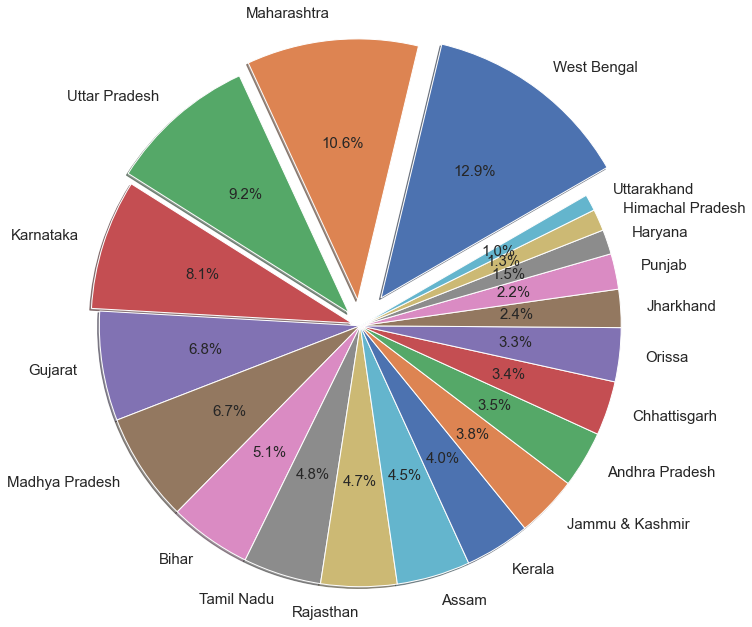

In [91]:
intermediate_data = clean_df_OutbreakIndia.loc[:,['Name of State/UT','No. of Cases']]
intermediate_data = intermediate_data.groupby('Name of State/UT').sum()
#As the record is too high so keeping all the record make the plot cumbersome, hence taking top 20 values for plotting
intermediate_sorted_data = pd.DataFrame(intermediate_data['No. of Cases'].sort_values(ascending=False)[:20])
explode = (0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(intermediate_sorted_data['No. of Cases'], labels = intermediate_sorted_data.index, autopct='%1.1f%%', radius=3,textprops={'fontsize': 15},counterclock=True, shadow=True,startangle = 30,explode = explode)
plt.show()

### No of cases Vs Name of District

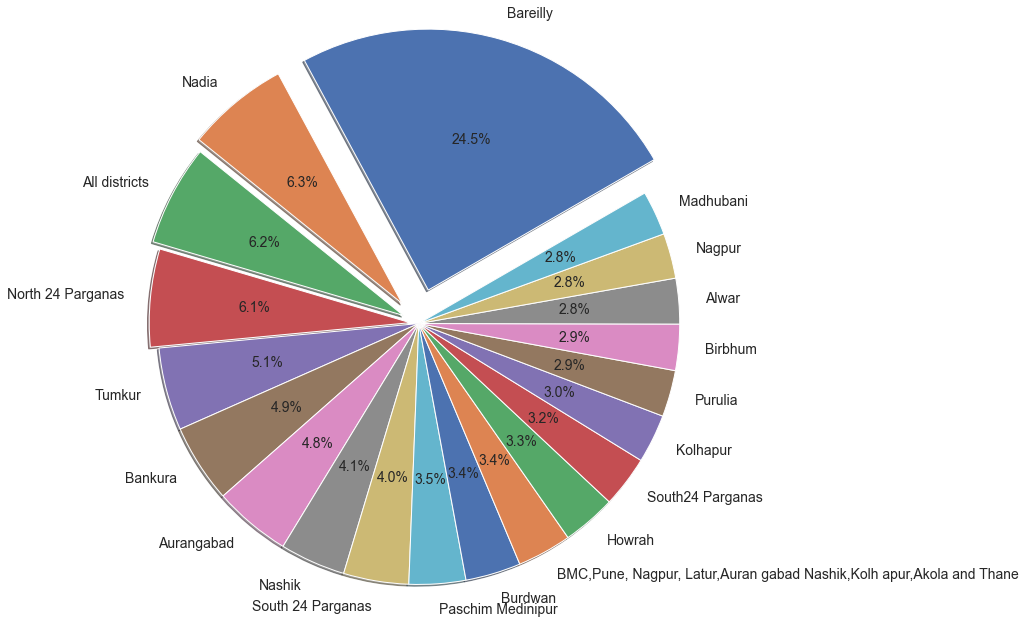

In [92]:
intermediate_data = clean_df_OutbreakIndia.loc[:,['Name of District','No. of Cases']]
intermediate_data = intermediate_data.groupby('Name of District').sum()
#As the record is too high so keeping all the record make the plot cumbersome, hence taking top 20 values for plotting
intermediate_sorted_data = pd.DataFrame(intermediate_data['No. of Cases'].sort_values(ascending=False)[:20])
explode = (0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(intermediate_sorted_data['No. of Cases'], labels = intermediate_sorted_data.index, autopct='%1.1f%%', radius=3,textprops={'fontsize': 14},counterclock=True, shadow=True,startangle = 30,explode = explode)
plt.show()

### No of cases Vs Disease/Illness

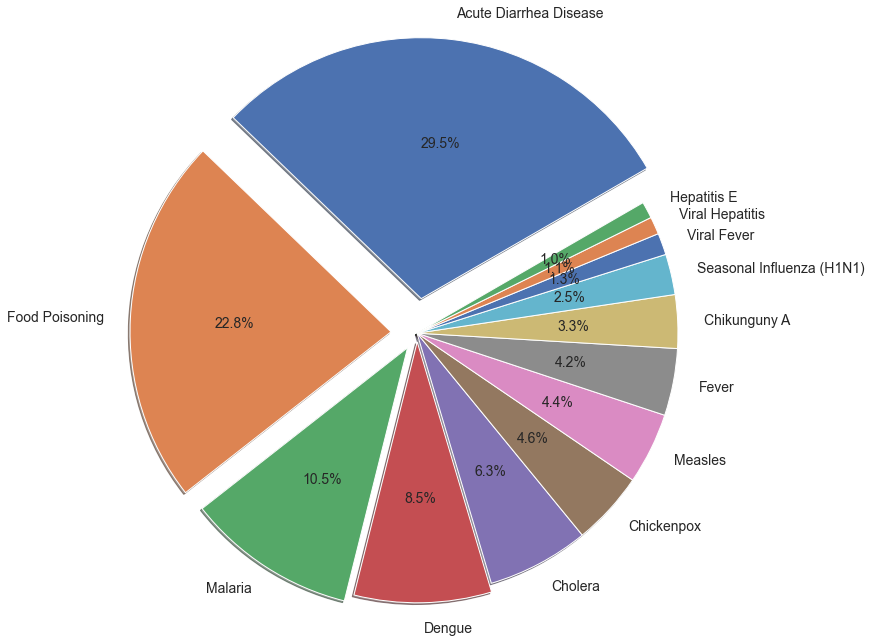

In [93]:
intermediate_data = clean_df_OutbreakIndia.loc[:,['Disease/Illness','No. of Cases']]
intermediate_data = intermediate_data.groupby('Disease/Illness').sum()
#As the record is too high so keeping all the record make the plot cumbersome, hence taking top 13 values for plotting
intermediate_sorted_data = pd.DataFrame(intermediate_data['No. of Cases'].sort_values(ascending=False)[:13])
explode = (0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(intermediate_sorted_data['No. of Cases'], labels = intermediate_sorted_data.index, autopct='%1.1f%%', radius=3,textprops={'fontsize': 14},counterclock=True, shadow=True,startangle = 30,explode = explode)
plt.show()

### No. of Deaths Vs Name of State/UT

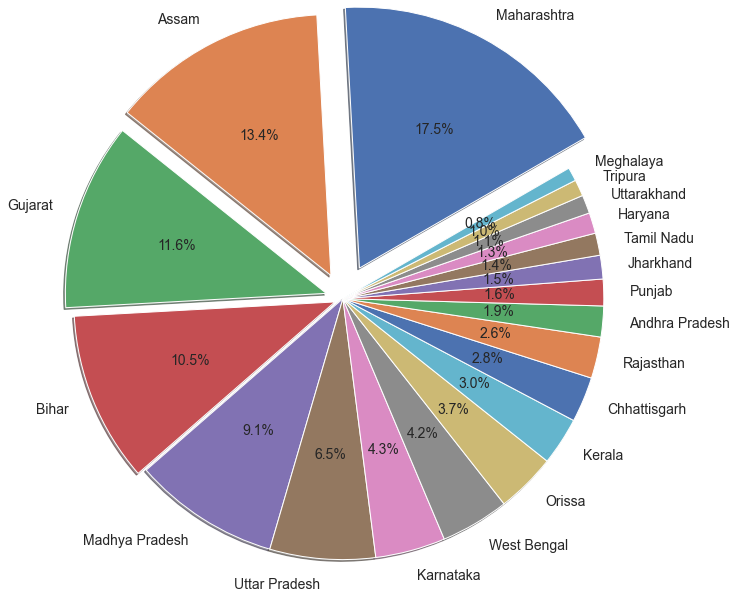

In [94]:
intermediate_data = clean_df_OutbreakIndia.loc[:,['Name of State/UT','No. of Deaths']]
intermediate_data = intermediate_data.groupby('Name of State/UT').sum()
#As the record is too high so keeping all the record make the plot cumbersome, hence taking top 20 values for plotting
intermediate_sorted_data = pd.DataFrame(intermediate_data['No. of Deaths'].sort_values(ascending=False)[:20])
explode = (0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(intermediate_sorted_data['No. of Deaths'], labels = intermediate_sorted_data.index, autopct='%1.1f%%', radius=3,textprops={'fontsize': 14},counterclock=True, shadow=True,startangle = 30,explode = explode)
plt.show()

In [97]:
#Scatter Plot:
#1. No. of  Death Vs No. of Cases for State, District

In [98]:
intermediate_data = clean_df_OutbreakIndia.loc[:,['Name of State/UT','Name of District','No. of Cases','No. of Deaths','Current Status']]
intermediate_data

Name of State/UT   Name of District  No. of Cases  No. of Deaths  \
0            Karnataka            Shimoga            38              0   
1       Madhya Pradesh       09 Districts            66              0   
2            Jharkhand       10 Districts           180              2   
3            Jharkhand       20 Districts           169              0   
4          West Bengal  24 South Paragnas            65              0   
...                ...                ...           ...            ...   
17646      Maharashtra           Yavatmal             6              0   
17647      Maharashtra           Yavatmal            13              1   
17648   Andhra Pradesh         YSR Kadapa            22              0   
17649         Nagaland          Zunheboto           243              0   
17650         Nagaland          Zunheboto             5              0   

           Current Status  
0           Under Control  
1      Under Surveillance  
2      Under Surveillance  
3      Under Surveillance  
4      Under Surveillance  
...                   ...  
17646       Under Control  
17647       Under Control  
17648  Under Surveillance  
17649  Under Surveillance  
17650  Under Surveillance  

[17598 rows x 5 columns]

### Scatter plot of State wise No. of Cases Vs No. of Deaths

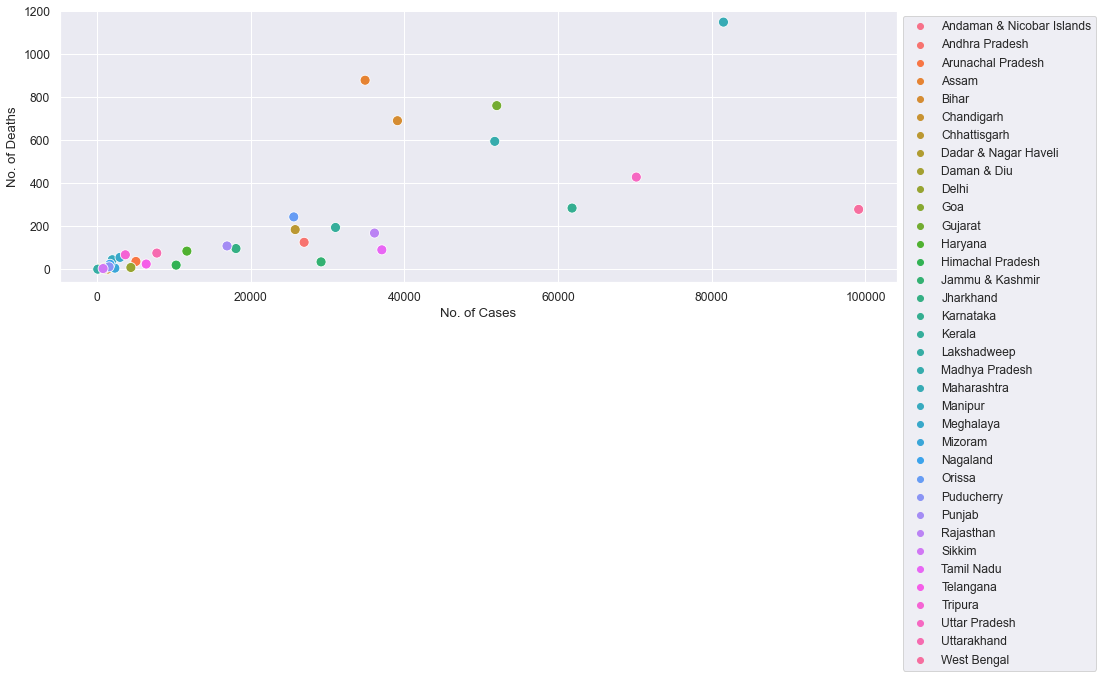

In [99]:
statewisedata = intermediate_data.groupby(['Name of State/UT']).sum()
plt.figure(figsize=(15,5))
sns.scatterplot(data=statewisedata, x="No. of Cases", y="No. of Deaths",hue="Name of State/UT", legend='full',s=100)
plt.legend(bbox_to_anchor = (1,1))
#plt.title('Scatter plot of State wise No. of Cases Vs No. of Deaths')
plt.show()

### Scatter plot of District wise No. of Cases Vs No. of Deaths

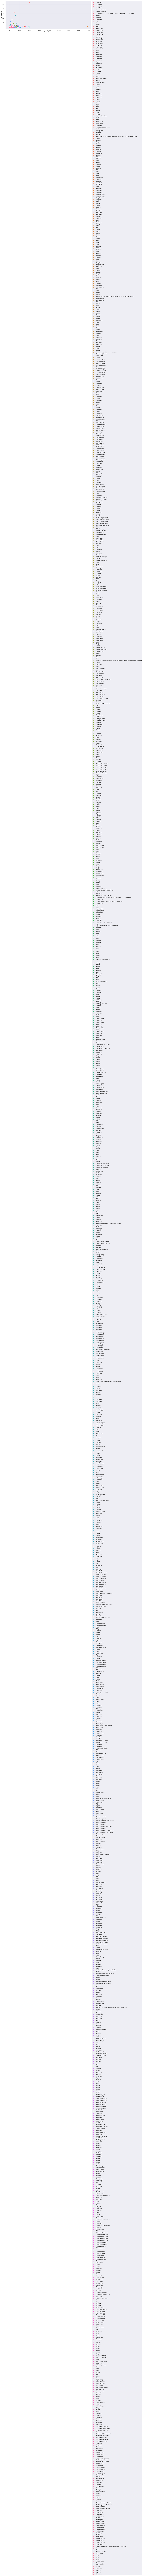

In [100]:
statewisedata = intermediate_data.groupby(['Name of District']).sum()
plt.figure(figsize=(15,5))
sns.scatterplot(data=statewisedata, x="No. of Cases", y="No. of Deaths",hue="Name of District", legend='full',s=100)
plt.legend(bbox_to_anchor = (1,1))
#plt.title('Scatter plot of District wise No. of Cases Vs No. of Deaths')
plt.show()

#### • Word clouds of different outbreaks in different districts

#### Diseases wise wordcloud based on no of cases

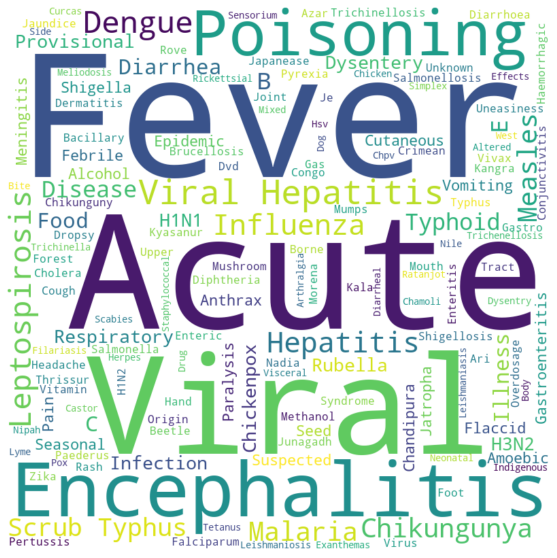

In [102]:
stopwords = set(STOPWORDS)
#wordcloud object creation 
objwordcloud_diseases = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 12)
DiseaseWiseCase = pd.DataFrame(wordcloud_intermediate_data.groupby('Disease/Illness').sum()['No. of Cases'].sort_values(ascending=False).index)
comma_seperated_diseases_noofcase = ''
for each_disease in DiseaseWiseCase['Disease/Illness']:
    comma_seperated_diseases_noofcase += each_disease + ','
objwordcloud_diseases.generate(comma_seperated_diseases_noofcase.rstrip(comma_seperated_diseases_noofcase[-1]))
plt.figure(figsize=(10,10), facecolor=None)
plt.imshow(objwordcloud_diseases, interpolation='bilinear')
plt.axis("off")
plt.show()  

#### District wise word cloud based on no of cases

#### • Geo-spatial plots for top 10 outbreaks in the assigned ”state” - Meghalaya

In [104]:
#Filter for Meghalaya 
filtering_state = 'Meghalaya'
clean_df_OutbreakIndia_Meghalaya = clean_df_OutbreakIndia[clean_df_OutbreakIndia["Name of State/UT"] == filtering_state]

In [105]:
np.unique(clean_df_OutbreakIndia_Meghalaya['Name of District']) 

array(['East Garo Hills', 'East Khasi Hills', 'Garo Hills',
       'Jaintia Hills', 'Jaintia Hills & West Kashi Hills', 'Ri Bhoi',
       'Shillong, East Khasi Hills, West Khasi Hills & Jaintia Hills',
       'South Garo Hills', 'South West Garo Hills', 'West Garo Hills',
       'West Khasi Hills'], dtype=object)

#### Top 10 outbreak for Meghalaya

In [106]:
OrderedDiseases_BasedofNoofCases_Meghalaya = pd.DataFrame(clean_df_OutbreakIndia_Meghalaya.groupby('Disease/Illness').sum()['No. of Cases'].sort_values(ascending=False))
OrderedDiseases_BasedofNoofCases_Meghalaya.reset_index(level=0, inplace=True)
OrderedDiseases_BasedofNoofCases_Meghalaya[:10]

Disease/Illness  No. of Cases
0  Acute Diarrhea Disease           907
1          Food Poisoning           480
2                 Measles           321
3              Chickenpox           200
4                  Dengue           189
5                   Fever           182
6  Japanease Encephalitis           137
7            Scrub Typhus           119
8                 Malaria            77
9       Measles & Rubella            76

In [107]:
OrderedDistrict_BasedofNoofCases_Meghalaya = pd.DataFrame(clean_df_OutbreakIndia_Meghalaya.groupby('Name of District').sum()['No. of Cases'].sort_values(ascending=False))
OrderedDistrict_BasedofNoofCases_Meghalaya_noIndex = OrderedDistrict_BasedofNoofCases_Meghalaya.reset_index(level=0)
OrderedDistrict_BasedofNoofCases_Meghalaya_noIndex[:10]

Name of District  No. of Cases
0                                      Jaintia Hills          1024
1                                   West Khasi Hills           713
2                                            Ri Bhoi           451
3                                    West Garo Hills           406
4                                   East Khasi Hills           254
5                                    East Garo Hills            66
6                                         Garo Hills            41
7  Shillong, East Khasi Hills, West Khasi Hills &...            16
8                                   South Garo Hills            14
9                   Jaintia Hills & West Kashi Hills             5

In [108]:
OrderedDistrict_BasedofNoofCases_Meghalaya

No. of Cases
Name of District                                                
Jaintia Hills                                               1024
West Khasi Hills                                             713
Ri Bhoi                                                      451
West Garo Hills                                              406
East Khasi Hills                                             254
East Garo Hills                                               66
Garo Hills                                                    41
Shillong, East Khasi Hills, West Khasi Hills & ...            16
South Garo Hills                                              14
Jaintia Hills & West Kashi Hills                               5
South West Garo Hills                                          4

#### Load the SHP file for Meghalaya

In [109]:
path = districtSHPPath
india_shp_df = geopnda.read_file(path)
india_shp_df_Meghalaya = india_shp_df[india_shp_df['ST_NM'] == filtering_state] 
india_shp_df_Meghalaya

DISTRICT      ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
167   East Garo Hills  Meghalaya         17          2         294   
170  East Khasi Hills  Meghalaya         17          6         298   
238     Jaintia Hills  Meghalaya         17          7         299   
482           Ri Bhoi  Meghalaya         17          5         297   
545  South Garo Hills  Meghalaya         17          3         295   
613   West Garo Hills  Meghalaya         17          1         293   
616  West Khasi Hills  Meghalaya         17          4         296   

                                              geometry  
167  POLYGON ((91.03234 25.88749, 91.03220 25.87930...  
170  POLYGON ((92.01985 25.18684, 92.01391 25.18854...  
238  POLYGON ((92.66161 25.57945, 92.66152 25.56794...  
482  POLYGON ((92.18042 26.07789, 92.18305 26.07455...  
545  POLYGON ((90.97256 25.17201, 90.95847 25.16973...  
613  POLYGON ((90.32286 25.46537, 90.31025 25.43463...  
616  POLYGON ((91.81149 25.64286, 91.81036 25.63488...

In [110]:
merged_data_Meghalaya = india_shp_df_Meghalaya.set_index('DISTRICT').join(OrderedDistrict_BasedofNoofCases_Meghalaya)
merged_data_Meghalaya
#There is no NAN value is present so further clean up is not required.

ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
DISTRICT                                                        
East Garo Hills   Meghalaya         17          2         294   
East Khasi Hills  Meghalaya         17          6         298   
Jaintia Hills     Meghalaya         17          7         299   
Ri Bhoi           Meghalaya         17          5         297   
South Garo Hills  Meghalaya         17          3         295   
West Garo Hills   Meghalaya         17          1         293   
West Khasi Hills  Meghalaya         17          4         296   

                                                           geometry  \
DISTRICT                                                              
East Garo Hills   POLYGON ((91.03234 25.88749, 91.03220 25.87930...   
East Khasi Hills  POLYGON ((92.01985 25.18684, 92.01391 25.18854...   
Jaintia Hills     POLYGON ((92.66161 25.57945, 92.66152 25.56794...   
Ri Bhoi           POLYGON ((92.18042 26.07789, 92.18305 26.07455...   
South Garo Hills  POLYGON ((90.97256 25.17201, 90.95847 25.16973...   
West Garo Hills   POLYGON ((90.32286 25.46537, 90.31025 25.43463...   
West Khasi Hills  POLYGON ((91.81149 25.64286, 91.81036 25.63488...   

                  No. of Cases  
DISTRICT                        
East Garo Hills             66  
East Khasi Hills           254  
Jaintia Hills             1024  
Ri Bhoi                    451  
South Garo Hills            14  
West Garo Hills            406  
West Khasi Hills           713

#### Geo spatial plot for Meghalaya based on most affected district by top 10 outbreak 

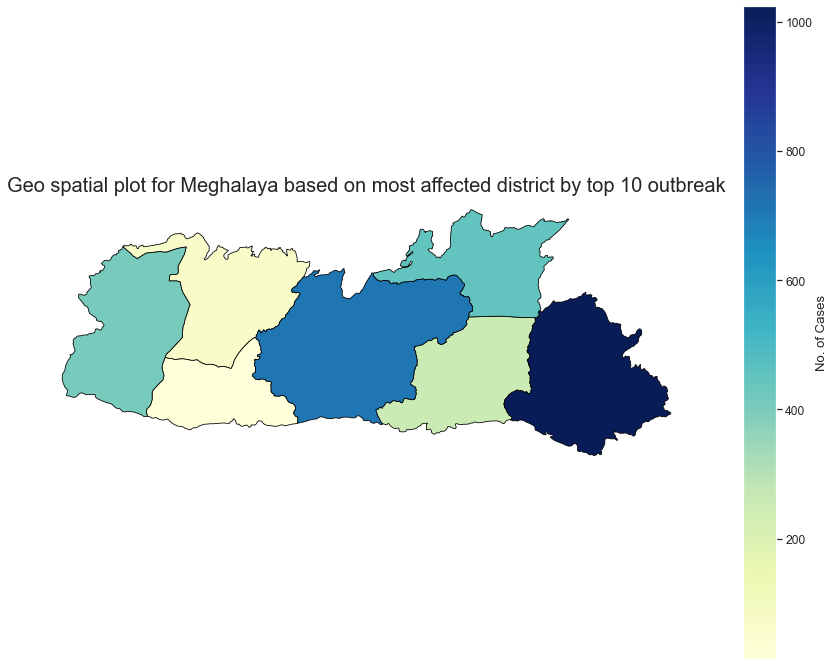

In [112]:
fig, ax = plt.subplots(1, figsize=(15, 12))
ax.axis('off')
ax.set_title('Geo spatial plot for Meghalaya based on most affected district by top 10 outbreak', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_data_Meghalaya.plot(column='No. of Cases',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "No. of Cases"})
plt.show()

#### For the assigned ”outbreak”, the geospatial plot for different states. #fever

#### Load india shp file for plotting the geospatial plot

In [113]:
path = indiaSHPPath
india_shp_df = geopnda.read_file(path)
india_shp_df

id                        st_nm  \
0   None  Andaman and Nicobar Islands   
1   None            Arunachal Pradesh   
2   None                        Assam   
3   None                        Bihar   
4   None                   Chandigarh   
5   None                 Chhattisgarh   
6   None       Dadra and Nagar Haveli   
7   None                Daman and Diu   
8   None                          Goa   
9   None                      Gujarat   
10  None                      Haryana   
11  None             Himachal Pradesh   
12  None                    Jharkhand   
13  None                    Karnataka   
14  None                       Kerala   
15  None                  Lakshadweep   
16  None               Madhya Pradesh   
17  None                  Maharashtra   
18  None                      Manipur   
19  None                    Meghalaya   
20  None                      Mizoram   
21  None                     Nagaland   
22  None                        Delhi   
23  None                   Puducherry   
24  None                       Punjab   
25  None                    Rajasthan   
26  None                       Sikkim   
27  None                   Tamil Nadu   
28  None                    Telangana   
29  None                      Tripura   
30  None                Uttar Pradesh   
31  None                  Uttarakhand   
32  None                  West Bengal   
33  None                       Odisha   
34  None               Andhra Pradesh   
35  None            Jammu and Kashmir   
36  None                       Ladakh   

                                             geometry  
0   MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  
1   POLYGON ((95.23643 26.68105, 95.19594 27.03612...  
2   POLYGON ((95.19594 27.03612, 95.08795 26.94578...  
3   POLYGON ((88.11357 26.54028, 88.28006 26.37640...  
4   POLYGON ((76.84208 30.76124, 76.83758 30.72552...  
5   POLYGON ((83.94694 23.62196, 83.95594 23.62406...  
6   POLYGON ((73.20640 20.12165, 73.20865 20.10695...  
7   POLYGON ((72.80144 20.37378, 72.84418 20.47463...  
8   POLYGON ((74.11982 15.65278, 74.24806 15.65698...  
9   MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...  
10  POLYGON ((77.12555 30.56374, 77.21329 30.50281...  
11  POLYGON ((78.92089 31.25498, 79.01313 31.11211...  
12  POLYGON ((87.79410 25.22084, 87.77835 25.10108...  
13  POLYGON ((77.55301 18.29376, 77.65650 17.97231...  
14  POLYGON ((76.43261 11.66713, 76.23238 11.57049...  
15  MULTIPOLYGON (((74.10182 11.20491, 73.96458 11...  
16  POLYGON ((82.81529 23.96232, 82.55207 23.79214...  
17  POLYGON ((80.66449 21.33184, 80.64649 21.25411...  
18  POLYGON ((94.68073 25.45405, 94.59974 25.18932...  
19  POLYGON ((92.43993 25.03175, 92.07772 25.18512...  
20  POLYGON ((93.00013 24.39934, 92.98439 24.12620...  
21  POLYGON ((95.23643 26.68105, 95.06770 26.46044...  
22  POLYGON ((77.19755 28.86191, 77.33703 28.67912...  
23  MULTIPOLYGON (((79.79156 10.99271, 79.79156 10...  
24  POLYGON ((76.73859 30.93982, 76.73859 30.93562...  
25  POLYGON ((74.28855 29.95655, 74.29980 29.95655...  
26  POLYGON ((88.75926 27.14748, 88.59728 27.19370...  
27  MULTIPOLYGON (((79.78256 11.89825, 79.79156 11...  
28  POLYGON ((81.05595 17.79162, 81.05820 17.75380...  
29  POLYGON ((92.23295 24.50229, 92.27345 24.38673...  
30  POLYGON ((80.07054 28.82830, 80.37201 28.63290...  
31  POLYGON ((80.07054 28.82830, 80.00079 28.71064...  
32  MULTIPOLYGON (((88.22156 21.76255, 88.31155 21...  
33  POLYGON ((86.72769 22.21848, 86.72094 22.14704...  
34  POLYGON ((81.10545 17.82313, 81.39342 17.81473...  
35  POLYGON ((74.09957 35.14187, 74.52028 35.10615...  
36  POLYGON ((76.79483 33.25515, 76.39662 33.66695...

#### Filter entire data with fever outbreak

In [114]:
filter_clean_df_OutbreakIndia_fever = clean_df_OutbreakIndia[clean_df_OutbreakIndia['Disease/Illness'] == 'Fever']
filter_clean_df_OutbreakIndia_fever

Serial no Name of State/UT Name of District Disease/Illness  \
142        143.0      Maharashtra       Ahmednagar           Fever   
143        144.0      Maharashtra       Ahmednagar           Fever   
145        146.0      Maharashtra       Ahmednagar           Fever   
146        147.0      Maharashtra       Ahmednagar           Fever   
147        148.0      Maharashtra       Ahmednagar           Fever   
...          ...              ...              ...             ...   
17614    17615.0      Maharashtra         Yavatmal           Fever   
17615    17616.0      Maharashtra         Yavatmal           Fever   
17616    17617.0      Maharashtra         Yavatmal           Fever   
17617    17618.0      Maharashtra         Yavatmal           Fever   
17624    17625.0      Maharashtra         Yavatmal           Fever   

       No. of Cases  No. of Deaths Date of start of outbreak  Date Reported  \
142             137              0                22-08-2012  Reported late   
143              64              0                06-09-2012  Reported late   
145              21              0                24-09-2012  Reported late   
146              44              0                03-10-2012  Reported late   
147              28              0                04-10-2012  Reported late   
...             ...            ...                       ...            ...   
17614            20              1                15-10-2014  Reported late   
17615            25              1                17-10-2014  Reported late   
17616            16              1                27-10-2014     05-11-2014   
17617            10              1                28-10-2014  Reported late   
17624             5              2                01-10-2015     09-10-2015   

           Current Status                                           Comments  
142         Under Control  Cases reported form Village Karjat Gavthan, SC...  
143         Under Control  Outbreak reported from SC Bagvatipur, PHC Kola...  
145         Under Control  Outbreak reported from Village/SC Nagardevale,...  
146         Under Control  Outbreak reported from Village Satral, PHC Guh...  
147         Under Control  Outbreak reported from Village Hingangaon, PHC...  
...                   ...                                                ...  
17614       Under Control  Cases reported from Village Narli, SC Amdapur,...  
17615  Under Surveillance  Cases of \n fever \n reported \n from Village ...  
17616  Under Surveillance  Cases \n reported \n from \n Village \n Talega...  
17617  Under Surveillance  Cases of fever reported Village / SC Dhanoda, ...  
17624       Under Control  Cases reported from Village Bodhadi, Block Gha...  

[802 rows x 10 columns]

#### Group the data Name of State/UT wise by No of cases

In [115]:
ord_grp_filter_clean_df_OutbreakIndia_fever = filter_clean_df_OutbreakIndia_fever.groupby(['Name of State/UT']).sum().sort_values(by = 'No. of Cases',ascending=False)
ord_grp_filter_clean_df_OutbreakIndia_fever

Serial no  No. of Cases  No. of Deaths
Name of State/UT                                         
Maharashtra        1938556.0          9315            164
Karnataka          1231679.0          4483              5
Tamil Nadu         1471581.0          2902              5
Madhya Pradesh      478118.0          2390              2
West Bengal         247490.0          1939              8
Rajasthan            54649.0          1494              0
Andhra Pradesh      410337.0          1403             14
Uttar Pradesh       211306.0          1397             13
Assam               161973.0           857              4
Jammu & Kashmir     135937.0           746              4
Uttarakhand         141732.0           597              8
Gujarat             183032.0           529              8
Jharkhand            90961.0           391              0
Telangana            94768.0           365              4
Tripura              30312.0           363              7
Orissa               47090.0           200              1
Meghalaya            31062.0           182              0
Himachal Pradesh     14798.0           170              0
Haryana              10763.0           131              0
Kerala               36806.0           123              0
Arunachal Pradesh    34372.0           108              0
Punjab               23684.0            75              0
Goa                  26952.0            56              3
Manipur              33410.0            51              5
Sikkim                4780.0            17              0
Bihar                 7776.0             2              1

#### Delete the No. of Deaths column as it is not necessary for further opertaion

In [116]:
ord_grp_filter_clean_df_OutbreakIndia_fever.drop('No. of Deaths',axis=1, inplace=True)
ord_grp_filter_clean_df_OutbreakIndia_fever

Serial no  No. of Cases
Name of State/UT                          
Maharashtra        1938556.0          9315
Karnataka          1231679.0          4483
Tamil Nadu         1471581.0          2902
Madhya Pradesh      478118.0          2390
West Bengal         247490.0          1939
Rajasthan            54649.0          1494
Andhra Pradesh      410337.0          1403
Uttar Pradesh       211306.0          1397
Assam               161973.0           857
Jammu & Kashmir     135937.0           746
Uttarakhand         141732.0           597
Gujarat             183032.0           529
Jharkhand            90961.0           391
Telangana            94768.0           365
Tripura              30312.0           363
Orissa               47090.0           200
Meghalaya            31062.0           182
Himachal Pradesh     14798.0           170
Haryana              10763.0           131
Kerala               36806.0           123
Arunachal Pradesh    34372.0           108
Punjab               23684.0            75
Goa                  26952.0            56
Manipur              33410.0            51
Sikkim                4780.0            17
Bihar                 7776.0             2

#### Geo spatial plot for fever diseases through out different states of india

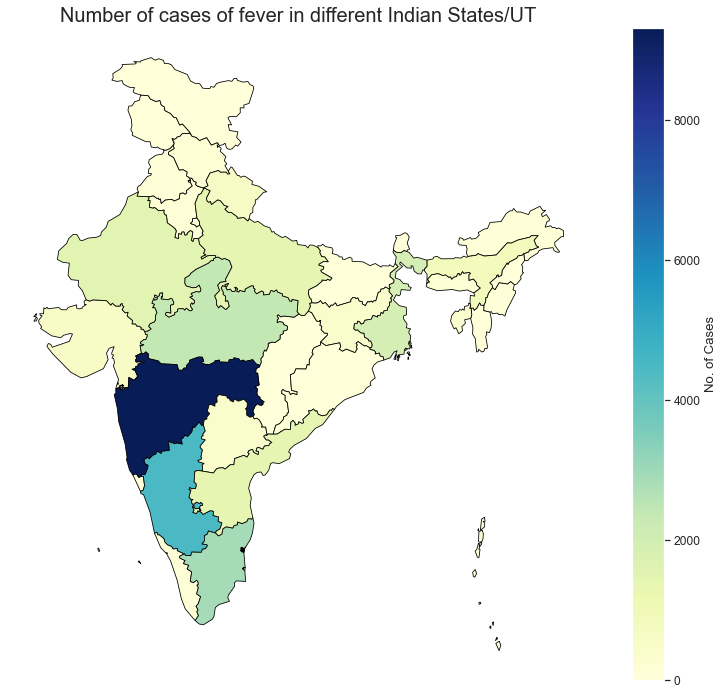

In [119]:
fig, ax = plt.subplots(1, figsize=(15, 12))
ax.axis('off')
ax.set_title('Number of cases of fever in different Indian States/UT', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_data_stateWise.plot(column='No. of Cases',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "No. of Cases"})
plt.show()

#### Perform descriptive statistical analysis for the occurrence of the top 10 outbreaks in the assigned ”states”

In [120]:
top10_Outbreak_in_Meghalaya = pd.DataFrame(clean_df_OutbreakIndia_Meghalaya.groupby('Disease/Illness').sum()[['No. of Cases','No. of Deaths']].sort_values(by = 'No. of Cases',ascending=False))[:10]
top10_Outbreak_in_Meghalaya.reset_index(level=0, inplace=True)
top10_Outbreak_in_Meghalaya

Disease/Illness  No. of Cases  No. of Deaths
0  Acute Diarrhea Disease           907              7
1          Food Poisoning           480             11
2                 Measles           321              6
3              Chickenpox           200              0
4                  Dengue           189              0
5                   Fever           182              0
6  Japanease Encephalitis           137             14
7            Scrub Typhus           119              0
8                 Malaria            77              7
9       Measles & Rubella            76              0

#### Descriptive statistical details for Top 10 outbreak in Meghalaya

In [121]:
include =['object', 'float', 'int']
top10_Outbreak_in_Meghalaya.describe(include=include)

Disease/Illness  No. of Cases  No. of Deaths
count                       10     10.000000      10.000000
unique                      10           NaN            NaN
top     Acute Diarrhea Disease           NaN            NaN
freq                         1           NaN            NaN
mean                       NaN    268.800000       4.500000
std                        NaN    255.394162       5.254628
min                        NaN     76.000000       0.000000
25%                        NaN    123.500000       0.000000
50%                        NaN    185.500000       3.000000
75%                        NaN    290.750000       7.000000
max                        NaN    907.000000      14.000000

#### plot the ”death/# of the case” ratio in geospatial plots for the assigned states for each district.

In [126]:
np.unique(clean_df_OutbreakIndia_Meghalaya['Name of District'])

array(['East Garo Hills', 'East Khasi Hills', 'Garo Hills',
       'Jaintia Hills', 'Jaintia Hills & West Kashi Hills', 'Ri Bhoi',
       'Shillong, East Khasi Hills, West Khasi Hills & Jaintia Hills',
       'South Garo Hills', 'South West Garo Hills', 'West Garo Hills',
       'West Khasi Hills'], dtype=object)

In [127]:
grp_clean_Meghalaya_data = clean_df_OutbreakIndia_Meghalaya.groupby(['Name of District']).sum().sort_values(by = 'No. of Cases',ascending=False)
grp_clean_Meghalaya_data.drop('Serial no', axis=1, inplace=True)
grp_clean_Meghalaya_data

No. of Cases  \
Name of District                                                   
Jaintia Hills                                               1024   
West Khasi Hills                                             713   
Ri Bhoi                                                      451   
West Garo Hills                                              406   
East Khasi Hills                                             254   
East Garo Hills                                               66   
Garo Hills                                                    41   
Shillong, East Khasi Hills, West Khasi Hills & ...            16   
South Garo Hills                                              14   
Jaintia Hills & West Kashi Hills                               5   
South West Garo Hills                                          4   

                                                    No. of Deaths  
Name of District                                                   
Jaintia Hills                                                  20  
West Khasi Hills                                                9  
Ri Bhoi                                                        18  
West Garo Hills                                                 4  
East Khasi Hills                                                0  
East Garo Hills                                                 1  
Garo Hills                                                      0  
Shillong, East Khasi Hills, West Khasi Hills & ...              0  
South Garo Hills                                                0  
Jaintia Hills & West Kashi Hills                                0  
South West Garo Hills                                           3

In [130]:
merged_data_Meghalaya_deathcase_ratio = india_shp_df_Meghalaya.set_index('DISTRICT').join(grp_clean_Meghalaya_data)
merged_data_Meghalaya_deathcase_ratio

ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
DISTRICT                                                        
East Garo Hills   Meghalaya         17          2         294   
East Khasi Hills  Meghalaya         17          6         298   
Jaintia Hills     Meghalaya         17          7         299   
Ri Bhoi           Meghalaya         17          5         297   
South Garo Hills  Meghalaya         17          3         295   
West Garo Hills   Meghalaya         17          1         293   
West Khasi Hills  Meghalaya         17          4         296   

                                                           geometry  \
DISTRICT                                                              
East Garo Hills   POLYGON ((91.03234 25.88749, 91.03220 25.87930...   
East Khasi Hills  POLYGON ((92.01985 25.18684, 92.01391 25.18854...   
Jaintia Hills     POLYGON ((92.66161 25.57945, 92.66152 25.56794...   
Ri Bhoi           POLYGON ((92.18042 26.07789, 92.18305 26.07455...   
South Garo Hills  POLYGON ((90.97256 25.17201, 90.95847 25.16973...   
West Garo Hills   POLYGON ((90.32286 25.46537, 90.31025 25.43463...   
West Khasi Hills  POLYGON ((91.81149 25.64286, 91.81036 25.63488...   

                  death/# of the case  
DISTRICT                               
East Garo Hills              0.015152  
East Khasi Hills             0.000000  
Jaintia Hills                0.019531  
Ri Bhoi                      0.039911  
South Garo Hills             0.000000  
West Garo Hills              0.009852  
West Khasi Hills             0.012623

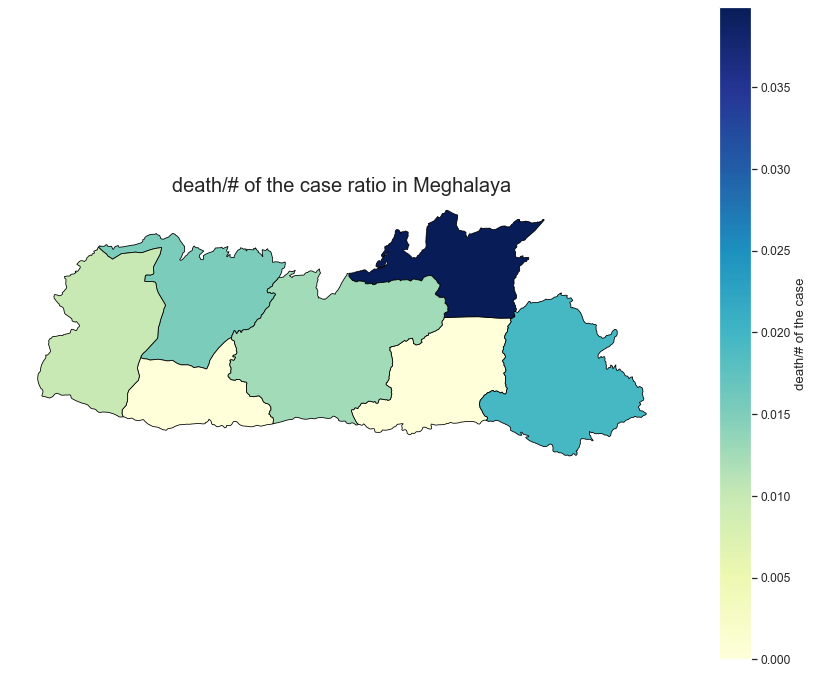

In [131]:
fig, ax = plt.subplots(1, figsize=(15, 12))
ax.axis('off')
ax.set_title('death/# of the case ratio in Meghalaya', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_data_Meghalaya_deathcase_ratio.plot(column='death/# of the case',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "death/# of the case"})
plt.show()

#### plot the ”death/# of the case” ratio in geospatial plots for the assigned states for each district for top 10 outbreak 